#### Mesh-1 : hybrid

In [1]:
import gmsh
import os
import subprocess
import meshio
import numpy as np
import sys

def header():
    gmsh.initialize()
    gmsh.model.add("Header")


    lc = 2.5e-3; lc_boundary = 5e-2; z_coor = 0; scale = 1000;

    gmsh.model.geo.addPoint(675.044420652/scale, 941.810501494/scale, z_coor, lc, 1)
    gmsh.model.geo.addPoint(1001.29293311/scale, 797.332371989/scale, z_coor, lc, 2)
    gmsh.model.geo.addPoint(675.044420652/scale, 797.332371989/scale, z_coor, lc, 3)
    gmsh.model.geo.addPoint(440.29388129/scale, 797.332371989/scale, z_coor, lc, 4)
    gmsh.model.geo.addPoint(425.148947625/scale, 941.810501494/scale, z_coor, lc, 5)

    gmsh.model.geo.addLine(1, 2, 5)
    gmsh.model.geo.addLine(2, 3, 6)
    gmsh.model.geo.addLine(3, 4, 7)
    gmsh.model.geo.addLine(4, 5, 8)
    gmsh.model.geo.addLine(5, 1, 9)
    gmsh.model.geo.addLine(1, 3, 10)

    gmsh.model.geo.synchronize()

    gmsh.model.geo.addCurveLoop([5, 6, -10], 1)
    gmsh.model.geo.addCurveLoop([9, 10, 7, 8], 2)

    gmsh.model.geo.addPlaneSurface([1], 3)
    gmsh.model.geo.addPlaneSurface([2], 4)

    for l in [7, 8, 9, 10]:
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 100, "Progression", 1)
    for l in [5, 6]:
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 200, "Progression", 1)

    gmsh.model.geo.mesh.setTransfiniteSurface(4)

    gmsh.model.geo.mesh.setRecombine(2, 4)

    gmsh.model.geo.synchronize()

    #Extrusion
    layers = 1; extrude_height = 0.01; extrude_vector = [0, 0, extrude_height];
    ex = gmsh.model.geo.extrude([(2, 3), (2, 4)], extrude_vector[0], extrude_vector[1], extrude_vector[2], numElements = [layers], recombine = True)

    gmsh.model.geo.synchronize()

    surface_ids = sorted([e[1] for e in ex if e[0] == 2])
    volume_ids = sorted([e[1] for e in ex if e[0] == 3])

    # # # List of surfaces to display
    # # surfaces_to_display = [surface_ids[0], surface_ids[20]]

    print(surface_ids, volume_ids)
    gmsh.model.addPhysicalGroup(3, volume_ids, 1)
    gmsh.model.setPhysicalName(3, 1, "Fluid")
    gmsh.model.addPhysicalGroup(2, [36], 2)
    gmsh.model.setPhysicalName(2, 2, "Inlet")
    gmsh.model.addPhysicalGroup(2, [44, 22], 3)
    gmsh.model.setPhysicalName(2, 3, "Outlet")
    gmsh.model.addPhysicalGroup(2, [49, 27, 4, 3], 4)
    gmsh.model.setPhysicalName(2, 4, "Sides")
    gmsh.model.addPhysicalGroup(2, [48, 18], 5)
    gmsh.model.setPhysicalName(2, 5, "Walls")
    
    # Mesh Generation
    gmsh.model.mesh.generate(3)

    mesh_file = os.path.abspath("Header.msh2")
    gmsh.write(mesh_file)

    # Launch the GUI to see the results:
    if '-nopopup' not in sys.argv:
        gmsh.fltk.run()

    gmsh.finalize()

    # Saving the mesh file, and opening it
    # mesh = meshio.read(mesh_file)

    # # Extract only the necessary parts of the mesh to avoid issues with cell sets
    # cells = [(cell_block.type, cell_block.data) for cell_block in mesh.cells]

    # # Create a new mesh object without cell sets
    # mesh_clean = meshio.Mesh(points=mesh.points, cells=cells)

    # meshio.write("36k_unstruct.vtk", mesh_clean)


if __name__ == "__main__":
    header()

[18, 22, 26, 26, 27, 36, 44, 48, 49] [1, 2]
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 5 (Line)
Info    : [ 10%] Meshing curve 6 (Line)
Info    : [ 20%] Meshing curve 7 (Line)
Info    : [ 20%] Meshing curve 8 (Line)
Info    : [ 30%] Meshing curve 9 (Line)
Info    : [ 30%] Meshing curve 10 (Line)
Info    : [ 40%] Meshing curve 12 (Extruded)
Info    : [ 50%] Meshing curve 13 (Extruded)
Info    : [ 50%] Meshing curve 14 (Extruded)
Info    : [ 60%] Meshing curve 16 (Extruded)
Info    : [ 60%] Meshing curve 17 (Extruded)
Info    : [ 70%] Meshing curve 21 (Extruded)
Info    : [ 80%] Meshing curve 29 (Extruded)
Info    : [ 80%] Meshing curve 31 (Extruded)
Info    : [ 90%] Meshing curve 32 (Extruded)
Info    : [ 90%] Meshing curve 34 (Extruded)
Info    : [100%] Meshing curve 43 (Extruded)
Info    : Done meshing 1D (Wall 0.000914891s, CPU 0.001049s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 3 (Plane, Frontal-Delaunay)
Info    : [ 20%] Meshing surface 4 (Transfinite)
I

#### Mesh-2

In [55]:
import gmsh
import os
import subprocess
import meshio
import numpy as np
import sys

def header():
    gmsh.initialize()
    gmsh.model.add("Header")


    lc = 7e-2; lc_boundary = 5e-2; z_coor = 0; scale = 1000;

    gmsh.model.geo.addPoint(675.044420652/scale, 941.810501494/scale, z_coor, lc, 1)
    gmsh.model.geo.addPoint(1001.29293311/scale, 797.332371989/scale, z_coor, lc, 2)
    gmsh.model.geo.addPoint(675.044420652/scale, 797.332371989/scale, z_coor, lc, 3)
    gmsh.model.geo.addPoint(440.29388129/scale, 797.332371989/scale, z_coor, lc, 4)
    gmsh.model.geo.addPoint(425.148947625/scale, 941.810501494/scale, z_coor, lc, 5)

    gmsh.model.geo.addPoint(838.1686769/scale, 869.569/scale, z_coor, lc, 6)
    gmsh.model.geo.addPoint(838.1686769/scale, 797.332371989/scale, z_coor, lc, 7)

    gmsh.model.geo.addLine(1, 6, 8)
    gmsh.model.geo.addLine(6, 2, 9)
    gmsh.model.geo.addLine(2, 7, 10)
    gmsh.model.geo.addLine(7, 3, 11)
    gmsh.model.geo.addLine(3, 4, 12)
    gmsh.model.geo.addLine(4, 5, 13)
    gmsh.model.geo.addLine(5, 1, 14)
    gmsh.model.geo.addLine(1, 3, 15)
    gmsh.model.geo.addLine(6, 7, 16)

    gmsh.model.geo.synchronize()

    gmsh.model.geo.addCurveLoop([15, 12, 13, 14], 1)
    gmsh.model.geo.addCurveLoop([8, 16, 11, -15], 2)
    gmsh.model.geo.addCurveLoop([9, 10, -16], 3)

    gmsh.model.geo.addPlaneSurface([1], 4)
    gmsh.model.geo.addPlaneSurface([2], 5)
    gmsh.model.geo.addPlaneSurface([3], 6)

    for l in [12, 14]:
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 150, "Progression", 1)
    for l in [13, 15, 16]:
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 85, "Progression", 1)
    for l in [11, 8]:
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 100, "Progression", 1)
    for l in [9, 10]:
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 75, "Progression", 1)

    gmsh.model.geo.mesh.setTransfiniteSurface(4)
    gmsh.model.geo.mesh.setTransfiniteSurface(5)

    gmsh.model.geo.mesh.setRecombine(2, 4)
    gmsh.model.geo.mesh.setRecombine(2, 5)

    gmsh.model.geo.synchronize()

    #Extrusion
    layers = 1; extrude_height = 0.01; extrude_vector = [0, 0, extrude_height];
    ex = gmsh.model.geo.extrude([(2, 4), (2, 5), (2, 6)], extrude_vector[0], extrude_vector[1], extrude_vector[2], numElements = [layers], recombine = True)

    gmsh.model.geo.synchronize()

    surface_ids = sorted([e[1] for e in ex if e[0] == 2])
    volume_ids = sorted([e[1] for e in ex if e[0] == 3])

    # # # List of surfaces to display
    # # surfaces_to_display = [surface_ids[0], surface_ids[20]]

    print(surface_ids, volume_ids)
    gmsh.model.addPhysicalGroup(3, volume_ids, 1)
    gmsh.model.setPhysicalName(3, 1, "Fluid")
    gmsh.model.addPhysicalGroup(2, [32], 2)
    gmsh.model.setPhysicalName(2, 2, "Inlet")
    gmsh.model.addPhysicalGroup(2, [20], 3)
    gmsh.model.setPhysicalName(2, 3, "Outlet")
    gmsh.model.addPhysicalGroup(2, [2, 37], 4)
    gmsh.model.setPhysicalName(2, 4, "Sides")
    named_surfaces = [32, 20, 2, 37]
    remaining_surfaces = [s for s in surface_ids if s not in named_surfaces]
    gmsh.model.addPhysicalGroup(2, remaining_surfaces, 5)
    gmsh.model.setPhysicalName(2, 5, "Walls")
    
    # Mesh Generation
    gmsh.model.mesh.generate(3)

    mesh_file = os.path.abspath("Header.msh2")
    gmsh.write(mesh_file)

    # Launch the GUI to see the results:
    if '-nopopup' not in sys.argv:
        gmsh.fltk.run()

    gmsh.finalize()

    # Saving the mesh file, and opening it
    # mesh = meshio.read(mesh_file)

    # # Extract only the necessary parts of the mesh to avoid issues with cell sets
    # cells = [(cell_block.type, cell_block.data) for cell_block in mesh.cells]

    # # Create a new mesh object without cell sets
    # mesh_clean = meshio.Mesh(points=mesh.points, cells=cells)

    # meshio.write("36k_unstruct.vtk", mesh_clean)


if __name__ == "__main__":
    header()

[25, 25, 29, 33, 37, 38, 47, 51, 51, 55, 60, 68, 72, 77] [1, 2, 3]
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 8 (Line)
Info    : [ 10%] Meshing curve 9 (Line)
Info    : [ 10%] Meshing curve 10 (Line)
Info    : [ 20%] Meshing curve 11 (Line)
Info    : [ 20%] Meshing curve 12 (Line)
Info    : [ 30%] Meshing curve 13 (Line)
Info    : [ 30%] Meshing curve 14 (Line)
Info    : [ 30%] Meshing curve 15 (Line)
Info    : [ 40%] Meshing curve 16 (Line)
Info    : [ 40%] Meshing curve 18 (Extruded)
Info    : [ 50%] Meshing curve 19 (Extruded)
Info    : [ 50%] Meshing curve 20 (Extruded)
Info    : [ 50%] Meshing curve 21 (Extruded)
Info    : [ 60%] Meshing curve 23 (Extruded)
Info    : [ 60%] Meshing curve 24 (Extruded)
Info    : [ 70%] Meshing curve 28 (Extruded)
Info    : [ 70%] Meshing curve 32 (Extruded)
Info    : [ 70%] Meshing curve 40 (Extruded)
Info    : [ 80%] Meshing curve 41 (Extruded)
Info    : [ 80%] Meshing curve 42 (Extruded)
Info    : [ 90%] Meshing curve 46 (Extruded)
In

Info    : Done meshing 3D (Wall 0.149941s, CPU 0.150685s)
Info    : Optimizing mesh...
Info    : Done optimizing mesh (Wall 0.00107273s, CPU 0.001247s)
Info    : 46378 nodes 77157 elements
Info    : Writing '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header.msh2'...
Info    : Done writing '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header.msh2'
-------------------------------------------------------
Version       : 4.13.1
License       : GNU General Public License
Build OS      : Linux64-sdk
Build date    : 20240524
Build host    : gmsh.info
Build options : 64Bit ALGLIB[contrib] ANN[contrib] Bamg Blas[petsc] Blossom Cgns DIntegration Dlopen DomHex Eigen[contrib] Fltk Gmm[contrib] Hxt Jpeg Kbipack Lapack[petsc] LinuxJoystick MathEx[contrib] Med Mesh Metis[contrib] Mmg Mpeg Netgen Nii2mesh ONELAB ONELABMetamodel OpenCASCADE OpenCASCADE-CAF OpenGL OpenMP OptHom PETSc Parser Plugins Png Post QuadMeshingTools QuadTri Solver TetGen/BR TinyXML2[contrib] Untangle Voro

#### Mesh-3 : unstructured

In [107]:
import gmsh
import os
import subprocess
import meshio
import numpy as np
import sys

def header():
    gmsh.initialize()
    gmsh.model.add("Header")


    lc = 2.5e-2; lc_boundary = 5e-2; z_coor = 0; scale = 1000;

    gmsh.model.geo.addPoint(675.044420652/scale, 941.810501494/scale, z_coor, lc, 1)
    gmsh.model.geo.addPoint(1001.29293311/scale, 797.332371989/scale, z_coor, lc, 2)
    gmsh.model.geo.addPoint(675.044420652/scale, 797.332371989/scale, z_coor, lc, 3)
    gmsh.model.geo.addPoint(440.29388129/scale, 797.332371989/scale, z_coor, lc, 4)
    gmsh.model.geo.addPoint(425.148947625/scale, 941.810501494/scale, z_coor, lc, 5)

    gmsh.model.geo.addLine(1, 2, 5)
    gmsh.model.geo.addLine(2, 3, 6)
    gmsh.model.geo.addLine(3, 4, 7)
    gmsh.model.geo.addLine(4, 5, 8)
    gmsh.model.geo.addLine(5, 1, 9)
    gmsh.model.geo.addLine(1, 3, 10)

    gmsh.model.geo.synchronize()

    gmsh.model.geo.addCurveLoop([5, 6, -10], 1)
    gmsh.model.geo.addCurveLoop([9, 10, 7, 8], 2)

    gmsh.model.geo.addPlaneSurface([1], 3)
    gmsh.model.geo.addPlaneSurface([2], 4)

    # for l in [8]:
    #     gmsh.model.geo.mesh.setTransfiniteCurve(l, 100, "Progression", 1)
    # for l in [5]:
    #     gmsh.model.geo.mesh.setTransfiniteCurve(l, 200, "Progression", 1)
    # for l in [7, 6]:
    #     gmsh.model.geo.mesh.setTransfiniteCurve(l, 150, "Progression", 1)

    gmsh.model.geo.synchronize()

    #Extrusion
    layers = 1; extrude_height = 0.01; extrude_vector = [0, 0, extrude_height];
    ex = gmsh.model.geo.extrude([(2, 3), (2, 4)], extrude_vector[0], extrude_vector[1], extrude_vector[2], numElements = [layers], recombine = True)

    gmsh.model.geo.synchronize()

    surface_ids = sorted([e[1] for e in ex if e[0] == 2])
    volume_ids = sorted([e[1] for e in ex if e[0] == 3])

    # # # List of surfaces to display
    # # surfaces_to_display = [surface_ids[0], surface_ids[20]]

    print(surface_ids, volume_ids)
    gmsh.model.addPhysicalGroup(3, volume_ids, 1)
    gmsh.model.setPhysicalName(3, 1, "Fluid")
    gmsh.model.addPhysicalGroup(2, [36], 2)
    gmsh.model.setPhysicalName(2, 2, "Inlet")
    gmsh.model.addPhysicalGroup(2, [44, 22], 3)
    gmsh.model.setPhysicalName(2, 3, "Outlet")
    gmsh.model.addPhysicalGroup(2, [49, 27, 4, 3], 4)
    gmsh.model.setPhysicalName(2, 4, "Sides")
    gmsh.model.addPhysicalGroup(2, [18, 48], 5)
    gmsh.model.setPhysicalName(2, 5, "Walls")
    
    # Mesh Generation
    gmsh.model.mesh.generate(3)

    mesh_file = os.path.abspath("Header_unstruct.msh2")
    gmsh.write(mesh_file)

    # Launch the GUI to see the results:
    if '-nopopup' not in sys.argv:
        gmsh.fltk.run()

    gmsh.finalize()

    # Saving the mesh file, and opening it
    # mesh = meshio.read(mesh_file)

    # # Extract only the necessary parts of the mesh to avoid issues with cell sets
    # cells = [(cell_block.type, cell_block.data) for cell_block in mesh.cells]

    # # Create a new mesh object without cell sets
    # mesh_clean = meshio.Mesh(points=mesh.points, cells=cells)

    # meshio.write("36k_unstruct.vtk", mesh_clean)


if __name__ == "__main__":
    header()

[18, 22, 26, 26, 27, 36, 44, 48, 49] [1, 2]
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 5 (Line)
Info    : [ 10%] Meshing curve 6 (Line)
Info    : [ 20%] Meshing curve 7 (Line)
Info    : [ 20%] Meshing curve 8 (Line)
Info    : [ 30%] Meshing curve 9 (Line)
Info    : [ 30%] Meshing curve 10 (Line)
Info    : [ 40%] Meshing curve 12 (Extruded)
Info    : [ 50%] Meshing curve 13 (Extruded)
Info    : [ 50%] Meshing curve 14 (Extruded)
Info    : [ 60%] Meshing curve 16 (Extruded)
Info    : [ 60%] Meshing curve 17 (Extruded)
Info    : [ 70%] Meshing curve 21 (Extruded)
Info    : [ 80%] Meshing curve 29 (Extruded)
Info    : [ 80%] Meshing curve 31 (Extruded)
Info    : [ 90%] Meshing curve 32 (Extruded)
Info    : [ 90%] Meshing curve 34 (Extruded)
Info    : [100%] Meshing curve 43 (Extruded)
Info    : Done meshing 1D (Wall 0.00109512s, CPU 0s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 3 (Plane, Frontal-Delaunay)
Info    : [ 20%] Meshing surface 4 (Plane, Frontal-Delauna

#### Post-processing

['mesh_1k.png', 'mesh_27k.png', 'mesh_47k.png', 'mesh_5k.png', 'mesh_95k.png', 'mesh_9k.png']


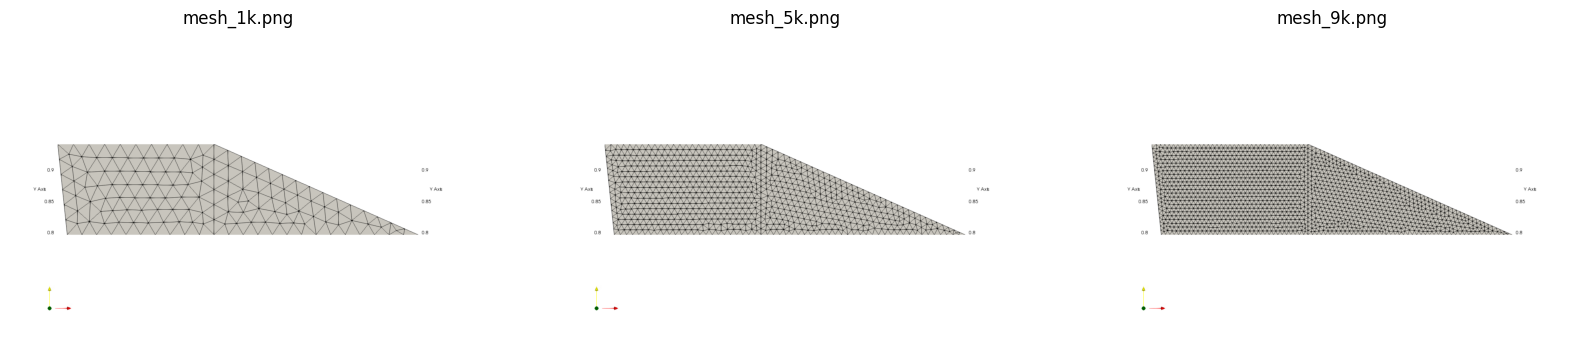

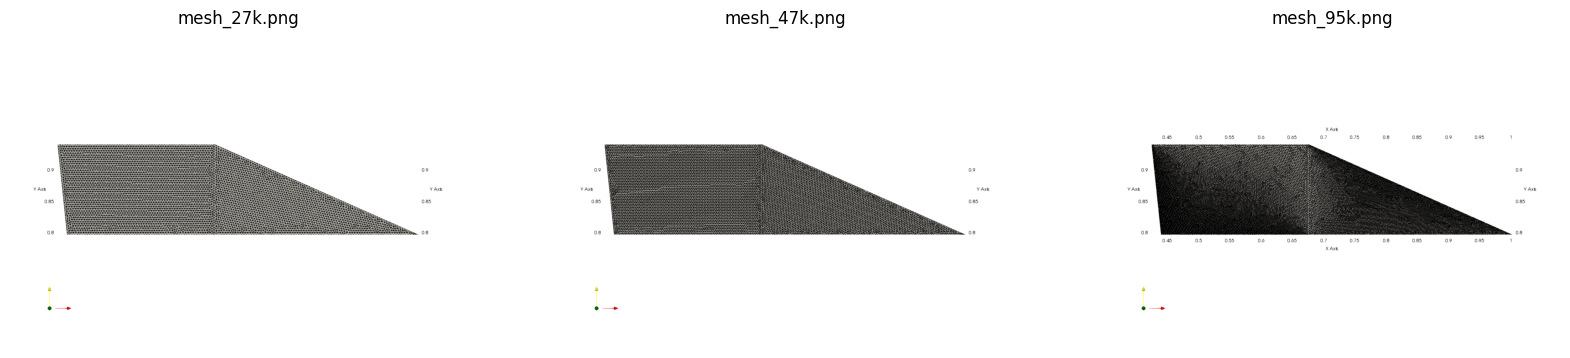

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import os

# Specify the directory where your PNG files are located
image_dir = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/data_files'

# List all files in the folder
files_image = os.listdir(image_dir)

# Filter out PNG files
png_files = sorted([f for f in files_image if f.endswith('.png')], reverse=False)
print(png_files)

images = []

# Load the images and store them in the array
for png_file in png_files:
    full_image_path = os.path.join(image_dir, png_file)  # Use a new variable to store the full path
    image = Image.open(full_image_path)
    images.append(np.array(image))

# Define the specific image indices you want to display
image_indices = [0, 3, 5]  

fig, axes = plt.subplots(1, 3, figsize=(20, 20))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

# Define the specific image indices you want to display
image_indices = [1, 2, 4]  

fig, axes = plt.subplots(1, 3, figsize=(20, 20))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

##### Pressure drop calculations

##### Original Design

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import os


# Specify the directory where your CSV files are located
folder_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/data_files'

# List all CSV files in the directory
csv_files = sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])
print(csv_files)
print("\n"*2)

num_rows = 1000;
num_cols = len(csv_files)
num_cases = 14

# Read each CSV file into a DataFrame
coor_x = np.zeros((num_rows, num_cols), dtype = np.float64)
pressure_stat = np.zeros((num_rows, num_cols), dtype = np.float64)
pressure_dyn = np.zeros((num_rows, num_cols), dtype = np.float64)
mass_flux = np.zeros((num_rows, num_cols), dtype = np.float64)


for idx, file in enumerate(csv_files):
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, skiprows = [0])
    pressure_dyn[:,idx] = df.iloc[:,0]
    mass_flux[:,idx] = df.iloc[:,1]
    pressure_stat[:,idx] = df.iloc[:,2]
    coor_x[:,idx] = df.iloc[:,3]


p_stat_inlet = []
p_stat_outlet = []
p_dyn_inlet = []
p_dyn_outlet = []
p_total_inlet = []
p_total_outlet = []

dx_inlet = coor_x[1,1] - coor_x[0,1]; dx_outlet = coor_x[1,7] - coor_x[0,7];


for i in range(14):
    if i < 7:
        p_stat_inlet.append(float(+1*(np.sum(pressure_stat[:,i]*dx_outlet) / (coor_x[-1,i] - coor_x[0,i]))))
        p_dyn_inlet.append(float(1*(np.sum(pressure_dyn[:,i]*dx_outlet*mass_flux[:,i]) / np.sum(mass_flux[:,i]*dx_outlet))))
        p_total_inlet.append(p_stat_inlet[-1] + p_dyn_inlet[-1])
    else:
        p_stat_outlet.append(float(np.sum(pressure_stat[:,i]*dx_outlet) / (coor_x[-1,i] - coor_x[0,i])))
        p_dyn_outlet.append(float(np.sum(pressure_dyn[:,i]*dx_outlet*mass_flux[:,i]) / np.sum(mass_flux[:,i]*dx_outlet)))
        p_total_outlet.append(p_stat_outlet[-1] + p_dyn_outlet[-1])

stat_pressure_drop = np.array(p_stat_inlet) - np.array(p_stat_outlet)
dynamic_pressure_drop = np.array(p_dyn_inlet) - np.array(p_dyn_outlet)
total_pressure_drop = np.array(p_total_inlet) - np.array(p_total_outlet)

# print(len(stat_pressure_drop), len(dynamic_pressure_drop), len(total_pressure_drop))


# Create DataFrame
data = {
    "Mesh": csv_files,
    "Static Pressure ": p_stat_inlet + p_stat_outlet,
    "Dynamic Pressure ": p_dyn_inlet + p_dyn_outlet,
    "Total Pressure (Pa)": p_total_inlet + p_total_outlet
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)

print("\n"*2)

# Create DataFrame
mesh_names = ["1k", "27k_pimple", "27k_simple", "47k", "5k", "95k", "9k"]
data = {
    "Mesh": mesh_names,
    "Static Pressure Drop ": stat_pressure_drop,
    "Dynamic Pressure Drop": dynamic_pressure_drop,
    "Total Pressure Drop": total_pressure_drop
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)

['inlet_1k.csv', 'inlet_27k_pimple.csv', 'inlet_27k_simple.csv', 'inlet_47k.csv', 'inlet_5k.csv', 'inlet_95k.csv', 'inlet_9k.csv', 'outlet_1k.csv', 'outlet_27k_pimple.csv', 'outlet_27k_simple.csv', 'outlet_47k.csv', 'outlet_5k.csv', 'outlet_95k.csv', 'outlet_9k.csv']



                     Mesh  Static Pressure   Dynamic Pressure   \
0            inlet_1k.csv         17.128247          44.568363   
1    inlet_27k_pimple.csv         16.600584          45.581761   
2    inlet_27k_simple.csv         16.760778          45.604144   
3           inlet_47k.csv         16.792122          45.662736   
4            inlet_5k.csv         16.941091          45.302815   
5           inlet_95k.csv         16.474024          45.668485   
6            inlet_9k.csv         16.833607          45.476730   
7           outlet_1k.csv          0.001669          49.351491   
8   outlet_27k_pimple.csv         -0.004462          50.894757   
9   outlet_27k_simple.csv         -0.001836          50.938325   
10 

### Straight Domain Design

#### Pressure function processing

In [3]:
def pressure_processing(csv_files, num_vanes):
    
    num_rows = 1000;
    num_cols = len(csv_files)

    array_names = ['inlet_dynamic_pressure', 'inlet_mass_flux', 'inlet_static_pressure', 'coorx_inlet', 'outlet_dynamic_pressure', 'outlet_mass_flux', 'outlet_static_pressure', 'coorx_outlet']
    arrays = {name: np.zeros((num_rows, num_vanes+1)) for name in array_names}

    dx_inlet = np.zeros(num_vanes+1); dx_outlet = np.zeros(num_vanes+1);

    p_stat_inlet = []; p_dyn_inlet = []; p_total_inlet = [];
    p_stat_outlet = []; p_dyn_outlet = []; p_total_outlet = [];

    for idx in range(num_vanes+1):
        df = pd.read_csv(os.path.join(folder_path, csv_files[idx]), skiprows=[0])
        arrays['inlet_dynamic_pressure'][:,idx] = df.iloc[:,0]
        arrays['inlet_mass_flux'][:,idx] = df.iloc[:,1]
        arrays['inlet_static_pressure'][:,idx] = df.iloc[:,2]
        arrays['coorx_inlet'][:,idx] = df.iloc[:,3]
        dx_inlet[idx] = df.iloc[1,3] - df.iloc[0,3]

    j = 0
    for idx in range(num_vanes+1, 2*(num_vanes+1)):
        df = pd.read_csv(os.path.join(folder_path, csv_files[idx]), skiprows=[0])
        arrays['outlet_dynamic_pressure'][:,j] = df.iloc[:,0]
        arrays['outlet_mass_flux'][:,j] = df.iloc[:,1]
        arrays['outlet_static_pressure'][:,j] = df.iloc[:,2]
        arrays['coorx_outlet'][:,j] = df.iloc[:,3]
        dx_outlet[j] = df.iloc[1,3] - df.iloc[0,3]
        j+=1

    j = 0
    for i in range(2*(num_vanes+1)):
        if i <= num_vanes:
            p_stat_inlet.append(float(+1*(np.sum(arrays['inlet_dynamic_pressure'][:,i]*dx_inlet[i]) / (arrays['coorx_inlet'][-1,i] - arrays['coorx_inlet'][0,i]))))
            p_dyn_inlet.append(float(1*(np.sum(arrays['inlet_dynamic_pressure'][:,i]*dx_inlet[i]*arrays['inlet_mass_flux'][:,i]) / np.sum(arrays['inlet_mass_flux'][:,i]*dx_inlet[i]))))
            p_total_inlet.append(p_stat_inlet[-1] + p_dyn_inlet[-1])
        else:
            p_stat_outlet.append(float(np.sum(arrays['outlet_static_pressure'][:,j]*dx_outlet[j]) / (arrays['coorx_outlet'][-1,j] - arrays['coorx_outlet'][0,j])))
            p_dyn_outlet.append(float(np.sum( arrays['outlet_dynamic_pressure'][:,j]*dx_outlet[j]*arrays['outlet_mass_flux'][:,j]) / np.sum(arrays['outlet_mass_flux'][:,j]*dx_outlet[j])))
            p_total_outlet.append(p_stat_outlet[-1] + p_dyn_outlet[-1])
            j+=1

    return p_stat_inlet, p_dyn_inlet, p_total_inlet, p_stat_outlet, p_dyn_outlet, p_total_outlet

##### 1 vanes

In [4]:
# Specify the directory where your CSV files are located
folder_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/1vanes_2.0'

# List all CSV files in the directory
csv_files = sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])
print(csv_files)
print("\n"*2)
num_vanes = 1


p_stat_inlet, p_dyn_inlet, p_total_inlet, p_stat_outlet, p_dyn_outlet, p_total_outlet = pressure_processing(csv_files, num_vanes)

stat_pressure_drop = np.array(p_stat_inlet) - np.array(p_stat_outlet)
dynamic_pressure_drop = np.array(p_dyn_inlet) - np.array(p_dyn_outlet)
total_pressure_drop = np.array(p_total_inlet) - np.array(p_total_outlet)

# Create DataFrame
data = {
    "Region": csv_files,
    "Static Pressure ": p_stat_inlet + p_stat_outlet,
    "Dynamic Pressure ": p_dyn_inlet + p_dyn_outlet,
    "Total Pressure (Pa)": p_total_inlet + p_total_outlet
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)

print("\n"*2)

# Create DataFrame
region_names = ["Region 1", "Region 2"]
data = {
    "Mesh": region_names,
    "Static Pressure Drop ": stat_pressure_drop,
    "Dynamic Pressure Drop": dynamic_pressure_drop,
    "Total Pressure Drop": total_pressure_drop
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)

['1vanes_inlet1.csv', '1vanes_inlet2.csv', '1vanes_outlet1.csv', '1vanes_outlet2.csv']



               Region  Static Pressure   Dynamic Pressure   \
0   1vanes_inlet1.csv         45.769604          45.552452   
1   1vanes_inlet2.csv         45.504269          45.569251   
2  1vanes_outlet1.csv         -0.003720          51.391970   
3  1vanes_outlet2.csv         -0.015459         193.078248   

   Total Pressure (Pa)  
0            91.322056  
1            91.073519  
2            51.388250  
3           193.062790  



       Mesh  Static Pressure Drop   Dynamic Pressure Drop  Total Pressure Drop
0  Region 1              45.773324              -5.839518            39.933806
1  Region 2              45.519727            -147.508998          -101.989271


##### 2 vanes

In [6]:
# Specify the directory where your CSV files are located
folder_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/2vanes_2.0'

# List all CSV files in the directory
csv_files = sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])
print(csv_files)
print("\n"*2)
num_vanes = 2


p_stat_inlet, p_dyn_inlet, p_total_inlet, p_stat_outlet, p_dyn_outlet, p_total_outlet = pressure_processing(csv_files, num_vanes)

stat_pressure_drop = np.array(p_stat_inlet) - np.array(p_stat_outlet)
dynamic_pressure_drop = np.array(p_dyn_inlet) - np.array(p_dyn_outlet)
total_pressure_drop = np.array(p_total_inlet) - np.array(p_total_outlet)

# Create DataFrame
data = {
    "Region": csv_files,
    "Static Pressure ": p_stat_inlet + p_stat_outlet,
    "Dynamic Pressure ": p_dyn_inlet + p_dyn_outlet,
    "Total Pressure (Pa)": p_total_inlet + p_total_outlet
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)

print("\n"*2)

# Create DataFrame
region_names = ["Region 1", "Region 2", "Region 3"]
data = {
    "Mesh": region_names,
    "Static Pressure Drop ": stat_pressure_drop,
    "Dynamic Pressure Drop": dynamic_pressure_drop,
    "Total Pressure Drop": total_pressure_drop
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)

['intlet_1.csv', 'intlet_2.csv', 'intlet_3.csv', 'outlet_1.csv', 'outlet_2.csv', 'outlet_3.csv']



         Region  Static Pressure   Dynamic Pressure   Total Pressure (Pa)
0  intlet_1.csv         45.487287          45.456355            90.943642
1  intlet_2.csv         45.511522          45.480900            90.992422
2  intlet_3.csv         45.473665          45.335542            90.809208
3  outlet_1.csv         -0.004807          47.685756            47.680949
4  outlet_2.csv         -0.021101         110.907732           110.886632
5  outlet_3.csv         -0.117981         192.656998           192.539017



       Mesh  Static Pressure Drop   Dynamic Pressure Drop  Total Pressure Drop
0  Region 1              45.492094              -2.229400            43.262693
1  Region 2              45.532623             -65.426832           -19.894210
2  Region 3              45.591646            -147.321455          -101.729809


##### 3 vanes

In [7]:
# Specify the directory where your CSV files are located
folder_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/3vanes_1.0'

# List all CSV files in the directory
csv_files = sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])
print(csv_files)
print("\n"*2)
num_vanes = 3


p_stat_inlet, p_dyn_inlet, p_total_inlet, p_stat_outlet, p_dyn_outlet, p_total_outlet = pressure_processing(csv_files, num_vanes)

stat_pressure_drop = np.array(p_stat_inlet) - np.array(p_stat_outlet)
dynamic_pressure_drop = np.array(p_dyn_inlet) - np.array(p_dyn_outlet)
total_pressure_drop = np.array(p_total_inlet) - np.array(p_total_outlet)

# Create DataFrame
data = {
    "Region": csv_files,
    "Static Pressure ": p_stat_inlet + p_stat_outlet,
    "Dynamic Pressure ": p_dyn_inlet + p_dyn_outlet,
    "Total Pressure (Pa)": p_total_inlet + p_total_outlet
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)

print("\n"*2)

# Create DataFrame
region_names = ["Region 1", "Region 2", "Region 3", "Region 4"]
data = {
    "Mesh": region_names,
    "Static Pressure Drop ": stat_pressure_drop,
    "Dynamic Pressure Drop": dynamic_pressure_drop,
    "Total Pressure Drop": total_pressure_drop
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)

['inlet_1.csv', 'inlet_2.csv', 'inlet_3.csv', 'inlet_4.csv', 'outlet_1.csv', 'outlet_2.csv', 'outlet_3.csv', 'outlet_4.csv']



         Region  Static Pressure   Dynamic Pressure   Total Pressure (Pa)
0   inlet_1.csv         45.147493          45.317737            90.465230
1   inlet_2.csv         45.388059          45.372038            90.760097
2   inlet_3.csv         45.110185          45.217498            90.327683
3   inlet_4.csv         45.329538          45.351904            90.681442
4  outlet_1.csv         -0.006039          37.592609            37.586570
5  outlet_2.csv         -0.020735          77.498788            77.478053
6  outlet_3.csv         -0.100823         127.354335           127.253512
7  outlet_4.csv          0.104220         177.594262           177.698482



       Mesh  Static Pressure Drop   Dynamic Pressure Drop  Total Pressure Drop
0  Region 1              45.153533               7.725128            52.878660
1  Region 2              45.408794           

##### 4 vanes

In [9]:
# Specify the directory where your CSV files are located
folder_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/4vanes_2.0'

# List all CSV files in the directory
csv_files = sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])
print(csv_files)
print("\n"*2)
num_vanes = 4


p_stat_inlet, p_dyn_inlet, p_total_inlet, p_stat_outlet, p_dyn_outlet, p_total_outlet = pressure_processing(csv_files, num_vanes)

stat_pressure_drop = np.array(p_stat_inlet) - np.array(p_stat_outlet)
dynamic_pressure_drop = np.array(p_dyn_inlet) - np.array(p_dyn_outlet)
total_pressure_drop = np.array(p_total_inlet) - np.array(p_total_outlet)

# Create DataFrame
data = {
    "Region": csv_files,
    "Static Pressure ": p_stat_inlet + p_stat_outlet,
    "Dynamic Pressure ": p_dyn_inlet + p_dyn_outlet,
    "Total Pressure (Pa)": p_total_inlet + p_total_outlet
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)

print("\n"*2)

# Create DataFrame
region_names = ["Region 1", "Region 2", "Region 3", "Region 4", "Region 5"]
data = {
    "Mesh": region_names,
    "Static Pressure Drop ": stat_pressure_drop,
    "Dynamic Pressure Drop": dynamic_pressure_drop,
    "Total Pressure Drop": total_pressure_drop
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)

['intlet_1.csv', 'intlet_2.csv', 'intlet_3.csv', 'intlet_4.csv', 'intlet_5.csv', 'outlet_1.csv', 'outlet_2.csv', 'outlet_3.csv', 'outlet_4.csv', 'outlet_5.csv']



         Region  Static Pressure   Dynamic Pressure   Total Pressure (Pa)
0  intlet_1.csv        -77.814588          45.220210           -32.594378
1  intlet_2.csv      -2831.064868          45.237005         -2785.827863
2  intlet_3.csv       2346.261277          45.221061          2391.482337
3  intlet_4.csv       1242.383183          45.167658          1287.550841
4  intlet_5.csv       1871.198717          45.311193          1916.509910
5  outlet_1.csv          0.073662          22.963888            23.037550
6  outlet_2.csv          0.199631          48.155176            48.354806
7  outlet_3.csv          0.263678          67.460602            67.724281
8  outlet_4.csv          0.800706          91.312553            92.113259
9  outlet_5.csv          1.414227         102.660571           104.074798



       Mesh  Static

##### 5 vanes

In [11]:
# Specify the directory where your CSV files are located
folder_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/5vanes_2.0'

# List all CSV files in the directory
csv_files = sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])
print(csv_files)
print("\n"*2)
num_vanes = 5


p_stat_inlet, p_dyn_inlet, p_total_inlet, p_stat_outlet, p_dyn_outlet, p_total_outlet = pressure_processing(csv_files, num_vanes)

stat_pressure_drop = np.array(p_stat_inlet) - np.array(p_stat_outlet)
dynamic_pressure_drop = np.array(p_dyn_inlet) - np.array(p_dyn_outlet)
total_pressure_drop = np.array(p_total_inlet) - np.array(p_total_outlet)

# Create DataFrame
data = {
    "Region": csv_files,
    "Static Pressure ": p_stat_inlet + p_stat_outlet,
    "Dynamic Pressure ": p_dyn_inlet + p_dyn_outlet,
    "Total Pressure (Pa)": p_total_inlet + p_total_outlet
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)

print("\n"*2)

# Create DataFrame
region_names = ["Region 1", "Region 2", "Region 3", "Region 4", "Region 5", "Region 6"]
data = {
    "Mesh": region_names,
    "Static Pressure Drop ": stat_pressure_drop,
    "Dynamic Pressure Drop": dynamic_pressure_drop,
    "Total Pressure Drop": total_pressure_drop
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)

['intlet_1.csv', 'intlet_2.csv', 'intlet_3.csv', 'intlet_4.csv', 'intlet_5.csv', 'intlet_6.csv', 'outlet_1.csv', 'outlet_2.csv', 'outlet_3.csv', 'outlet_4.csv', 'outlet_5.csv', 'outlet_6.csv']



          Region  Static Pressure   Dynamic Pressure   Total Pressure (Pa)
0   intlet_1.csv         44.836929          45.113799            89.950728
1   intlet_2.csv         45.168511          45.166102            90.334613
2   intlet_3.csv         44.815308          45.122086            89.937394
3   intlet_4.csv         45.103402          45.130798            90.234200
4   intlet_5.csv         44.707143          45.057539            89.764682
5   intlet_6.csv         45.168842          45.218543            90.387385
6   outlet_1.csv         -0.005565          14.189662            14.184097
7   outlet_2.csv         -0.018826          31.145083            31.126257
8   outlet_3.csv         -0.035689          47.065971            47.030281
9   outlet_4.csv         -0.072639          63.447411 

##### 6 vanes

In [13]:
# Specify the directory where your CSV files are located
folder_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/6vanes_2.0'

# List all CSV files in the directory
csv_files = sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])
print(csv_files)
print("\n"*2)
num_vanes = 6


p_stat_inlet, p_dyn_inlet, p_total_inlet, p_stat_outlet, p_dyn_outlet, p_total_outlet = pressure_processing(csv_files, num_vanes)

stat_pressure_drop = np.array(p_stat_inlet) - np.array(p_stat_outlet)
dynamic_pressure_drop = np.array(p_dyn_inlet) - np.array(p_dyn_outlet)
total_pressure_drop = np.array(p_total_inlet) - np.array(p_total_outlet)

# Create DataFrame
data = {
    "Region": csv_files,
    "Static Pressure ": p_stat_inlet + p_stat_outlet,
    "Dynamic Pressure ": p_dyn_inlet + p_dyn_outlet,
    "Total Pressure (Pa)": p_total_inlet + p_total_outlet
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)

print("\n"*2)

# Create DataFrame
region_names = ["Region 1", "Region 2", "Region 3", "Region 4", "Region 5", "Region 6", "Region 7"]
data = {
    "Mesh": region_names,
    "Static Pressure Drop ": stat_pressure_drop,
    "Dynamic Pressure Drop": dynamic_pressure_drop,
    "Total Pressure Drop": total_pressure_drop
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)

['inlet_1.csv', 'inlet_2.csv', 'inlet_3.csv', 'inlet_4.csv', 'inlet_5.csv', 'inlet_6.csv', 'inlet_7.csv', 'outlet_1.csv', 'outlet_2.csv', 'outlet_3.csv', 'outlet_4.csv', 'outlet_5.csv', 'outlet_6.csv', 'outlet_7.csv']



          Region  Static Pressure   Dynamic Pressure   Total Pressure (Pa)
0    inlet_1.csv         45.697202          45.041365            90.738566
1    inlet_2.csv         44.754671          45.092266            89.846937
2    inlet_3.csv         45.756853          45.084040            90.840893
3    inlet_4.csv         44.680229          45.046310            89.726539
4    inlet_5.csv         44.243642          44.968782            89.212424
5    inlet_6.csv         44.568852          44.998972            89.567824
6    inlet_7.csv         44.730036          45.127582            89.857617
7   outlet_1.csv         -0.007523          13.185622            13.178098
8   outlet_2.csv         -0.014178          22.492912            22.478734
9   outlet_3.csv         -0.0

### Curved Domain Design

##### 3 vanes

In [14]:
# Specify the directory where your CSV files are located
folder_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/Trial_5_curved/3_vanes_2.0'

# List all CSV files in the directory
csv_files = sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])
print(csv_files)
print("\n"*2)
num_vanes = 3


p_stat_inlet, p_dyn_inlet, p_total_inlet, p_stat_outlet, p_dyn_outlet, p_total_outlet = pressure_processing(csv_files, num_vanes)

stat_pressure_drop = np.array(p_stat_inlet) - np.array(p_stat_outlet)
dynamic_pressure_drop = np.array(p_dyn_inlet) - np.array(p_dyn_outlet)
total_pressure_drop = np.array(p_total_inlet) - np.array(p_total_outlet)

# Create DataFrame
data = {
    "Region": csv_files,
    "Static Pressure ": p_stat_inlet + p_stat_outlet,
    "Dynamic Pressure ": p_dyn_inlet + p_dyn_outlet,
    "Total Pressure (Pa)": p_total_inlet + p_total_outlet
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)

print("\n"*2)

# Create DataFrame
region_names = ["Region 1", "Region 2", "Region 3", "Region 4"]
data = {
    "Mesh": region_names,
    "Static Pressure Drop ": stat_pressure_drop,
    "Dynamic Pressure Drop": dynamic_pressure_drop,
    "Total Pressure Drop": total_pressure_drop
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)

['intlet_1.csv', 'intlet_2.csv', 'intlet_3.csv', 'intlet_4.csv', 'outlet_1.csv', 'outlet_2.csv', 'outlet_3.csv', 'outlet_4.csv']



         Region  Static Pressure   Dynamic Pressure   Total Pressure (Pa)
0  intlet_1.csv         45.821609          45.589817            91.411425
1  intlet_2.csv         45.868012          45.356898            91.224910
2  intlet_3.csv         45.045783          45.046951            90.092734
3  intlet_4.csv         44.605506          44.959111            89.564618
4  outlet_1.csv         -0.005864          33.186521            33.180657
5  outlet_2.csv          0.003774          57.611240            57.615014
6  outlet_3.csv         -0.010300          34.670181            34.659881
7  outlet_4.csv         -0.028182          56.373032            56.344850



       Mesh  Static Pressure Drop   Dynamic Pressure Drop  Total Pressure Drop
0  Region 1              45.827472              12.403296            58.230768
1  Region 2              45.864238       

##### 4 vanes

In [16]:
# Specify the directory where your CSV files are located
folder_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/Trial_5_curved/2nd_order_4vanes_1.0'

# List all CSV files in the directory
csv_files = sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])
print(csv_files)
print("\n"*2)
num_vanes = 4


p_stat_inlet, p_dyn_inlet, p_total_inlet, p_stat_outlet, p_dyn_outlet, p_total_outlet = pressure_processing(csv_files, num_vanes)

stat_pressure_drop = np.array(p_stat_inlet) - np.array(p_stat_outlet)
dynamic_pressure_drop = np.array(p_dyn_inlet) - np.array(p_dyn_outlet)
total_pressure_drop = np.array(p_total_inlet) - np.array(p_total_outlet)

# Create DataFrame
data = {
    "Region": csv_files,
    "Static Pressure ": p_stat_inlet + p_stat_outlet,
    "Dynamic Pressure ": p_dyn_inlet + p_dyn_outlet,
    "Total Pressure (Pa)": p_total_inlet + p_total_outlet
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)

print("\n"*2)

# Create DataFrame
region_names = ["Region 1", "Region 2", "Region 3", "Region 4", "Region 5"]
data = {
    "Mesh": region_names,
    "Static Pressure Drop ": stat_pressure_drop,
    "Dynamic Pressure Drop": dynamic_pressure_drop,
    "Total Pressure Drop": total_pressure_drop
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)

['intlet_1.csv', 'intlet_2.csv', 'intlet_3.csv', 'intlet_4.csv', 'intlet_5.csv', 'outlet_1.csv', 'outlet_2.csv', 'outlet_3.csv', 'outlet_4.csv', 'outlet_5.csv']



         Region  Static Pressure   Dynamic Pressure   Total Pressure (Pa)
0  intlet_1.csv         45.839118          45.486692            91.325810
1  intlet_2.csv         44.561621          45.249174            89.810795
2  intlet_3.csv         45.868038          45.356919            91.224957
3  intlet_4.csv         45.045782          45.046954            90.092736
4  intlet_5.csv         44.605507          44.959112            89.564619
5  outlet_1.csv         -0.010710          23.996033            23.985323
6  outlet_2.csv          0.001080          46.043642            46.044721
7  outlet_3.csv          0.003777          57.611278            57.615054
8  outlet_4.csv         -0.010282          34.663792            34.653510
9  outlet_5.csv         -0.028046          56.400727            56.372682



       Mesh  Static

##### 5 vanes

In [17]:
# Specify the directory where your CSV files are located
folder_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/data_files/Curved_data_files'

# List all CSV files in the directory
csv_files = sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])
print(csv_files)

num_rows = 1000;
num_cols = len(csv_files)
num_cases = 12

array_names = ['inlet_dynamic_pressure', 'inlet_mass_flux', 'inlet_static_pressure', 'coorx_inlet', 'outlet_dynamic_pressure', 'outlet_mass_flux', 'outlet_static_pressure', 'coorx_outlet']
arrays = {name: np.zeros((1000, 6)) for name in array_names}

dx_inlet = np.zeros(6); dx_outlet = np.zeros(6);

p_stat_inlet = []; p_dyn_inlet = []; p_total_inlet = [];
p_stat_outlet = []; p_dyn_outlet = []; p_total_outlet = [];

for idx in range(6):
    df = pd.read_csv(os.path.join(folder_path, csv_files[idx]), skiprows=[0])
    arrays['inlet_dynamic_pressure'][:,idx] = df.iloc[:,0]
    arrays['inlet_mass_flux'][:,idx] = df.iloc[:,1]
    arrays['inlet_static_pressure'][:,idx] = df.iloc[:,2]
    arrays['coorx_inlet'][:,idx] = df.iloc[:,3]
    dx_inlet[idx] = df.iloc[1,3] - df.iloc[0,3]

for idx in range(6):
    df = pd.read_csv(os.path.join(folder_path, csv_files[idx+6]), skiprows=[0])
    arrays['outlet_dynamic_pressure'][:,idx] = df.iloc[:,0]
    arrays['outlet_mass_flux'][:,idx] = df.iloc[:,1]
    arrays['outlet_static_pressure'][:,idx] = df.iloc[:,2]
    arrays['coorx_outlet'][:,idx] = df.iloc[:,3]
    dx_outlet[idx] = df.iloc[1,3] - df.iloc[0,3]


for i in range(12):
    if i < 6:
        p_stat_inlet.append(float(+1*(np.sum(arrays['inlet_dynamic_pressure'][:,idx]*dx_inlet[i]) / (arrays['coorx_inlet'][-1,i] - arrays['coorx_inlet'][0,i]))))
        p_dyn_inlet.append(float(1*(np.sum(arrays['inlet_dynamic_pressure'][:,i]*dx_inlet[i]*arrays['inlet_mass_flux'][:,i]) / np.sum(arrays['inlet_mass_flux'][:,i]*dx_inlet[i]))))
        p_total_inlet.append(p_stat_inlet[-1] + p_dyn_inlet[-1])
    else:
        p_stat_outlet.append(float(np.sum(arrays['outlet_static_pressure'][:,i-6]*dx_outlet[i-6]) / (arrays['coorx_outlet'][-1,i-6] - arrays['coorx_outlet'][0,i-6])))
        p_dyn_outlet.append(float(np.sum( arrays['outlet_dynamic_pressure'][:,i-6]*dx_outlet[i-6]*arrays['outlet_mass_flux'][:,i-6]) / np.sum(arrays['outlet_mass_flux'][:,i-6]*dx_outlet[i-6])))
        p_total_outlet.append(p_stat_outlet[-1] + p_dyn_outlet[-1])

stat_pressure_drop = np.array(p_stat_inlet) - np.array(p_stat_outlet)
dynamic_pressure_drop = np.array(p_dyn_inlet) - np.array(p_dyn_outlet)
total_pressure_drop = np.array(p_total_inlet) - np.array(p_total_outlet)

# Create DataFrame
data = {
    "Region": csv_files,
    "Static Pressure ": p_stat_inlet + p_stat_outlet,
    "Dynamic Pressure ": p_dyn_inlet + p_dyn_outlet,
    "Total Pressure (Pa)": p_total_inlet + p_total_outlet
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)

print("\n"*2)

# Create DataFrame
region_names = ["Region 1", "Region 2", "Region 3", "Region 4", "Region 5", "Region 6"]
data = {
    "Mesh": region_names,
    "Static Pressure Drop ": stat_pressure_drop,
    "Dynamic Pressure Drop": dynamic_pressure_drop,
    "Total Pressure Drop": total_pressure_drop
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)

['inlet_1_curved.csv', 'inlet_2_curved.csv', 'inlet_3_curved.csv', 'inlet_4_curved.csv', 'inlet_5_curved.csv', 'inlet_6_curved.csv', 'outet_1_curved.csv', 'outet_2_curved.csv', 'outet_3_curved.csv', 'outet_4_curved.csv', 'outet_5_curved.csv', 'outet_6_curved.csv']
                Region  Static Pressure   Dynamic Pressure   \
0   inlet_1_curved.csv         43.521433          45.495045   
1   inlet_2_curved.csv         43.235252          45.247182   
2   inlet_3_curved.csv         43.235252          45.254757   
3   inlet_4_curved.csv         43.629345          44.989469   
4   inlet_5_curved.csv         45.390926          44.229149   
5   inlet_6_curved.csv         42.144296          44.066846   
6   outet_1_curved.csv         -0.011930          29.321114   
7   outet_2_curved.csv         -0.002549          28.105232   
8   outet_3_curved.csv          0.002206          39.855526   
9   outet_4_curved.csv         -0.013164          34.647349   
10  outet_5_curved.csv         -0.015123  

#### CoV and uniformity index calculation

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import os
import statistics

def extract_y_component(data, index):
    
    y_component = []
    
    for line in data:

        if line.startswith('{'):
            break

        # Extract the Uy component from vector lines
        if line.startswith('('):
            vector_values = line.strip('()').split()
            uy_value = float(vector_values[index])  # 1 for y component, 0 for x component
            y_component.append(uy_value)
            # print(y_component)

    return np.array(y_component)

##### Original Design

['1_straight_vanes_2.0.csv', '27k_simple.csv', '2_straight_vanes_2.0.csv', '3_curved_vanes_2.0.csv', '3_straight_vanes_1.0.csv', '47k.csv', '4_curved_vanes_2.0.csv', '4_straight_vanes_2.0.csv', '5_curved_vanes_2.0.csv', '5_straight_vanes_2.0.csv', '6_straight_vanes_2.0.csv', '9k.csv']



         Name  CoV inlet  CoV outlet  UI inlet  UI outlet  Averaged outlet |U|
0  27k_simple        0.0    0.998001       1.0   0.001999             4.167490
1         47k        0.0    0.984550       1.0   0.015450             4.199257
2          9k        0.0    0.995015       1.0   0.004985             4.186400


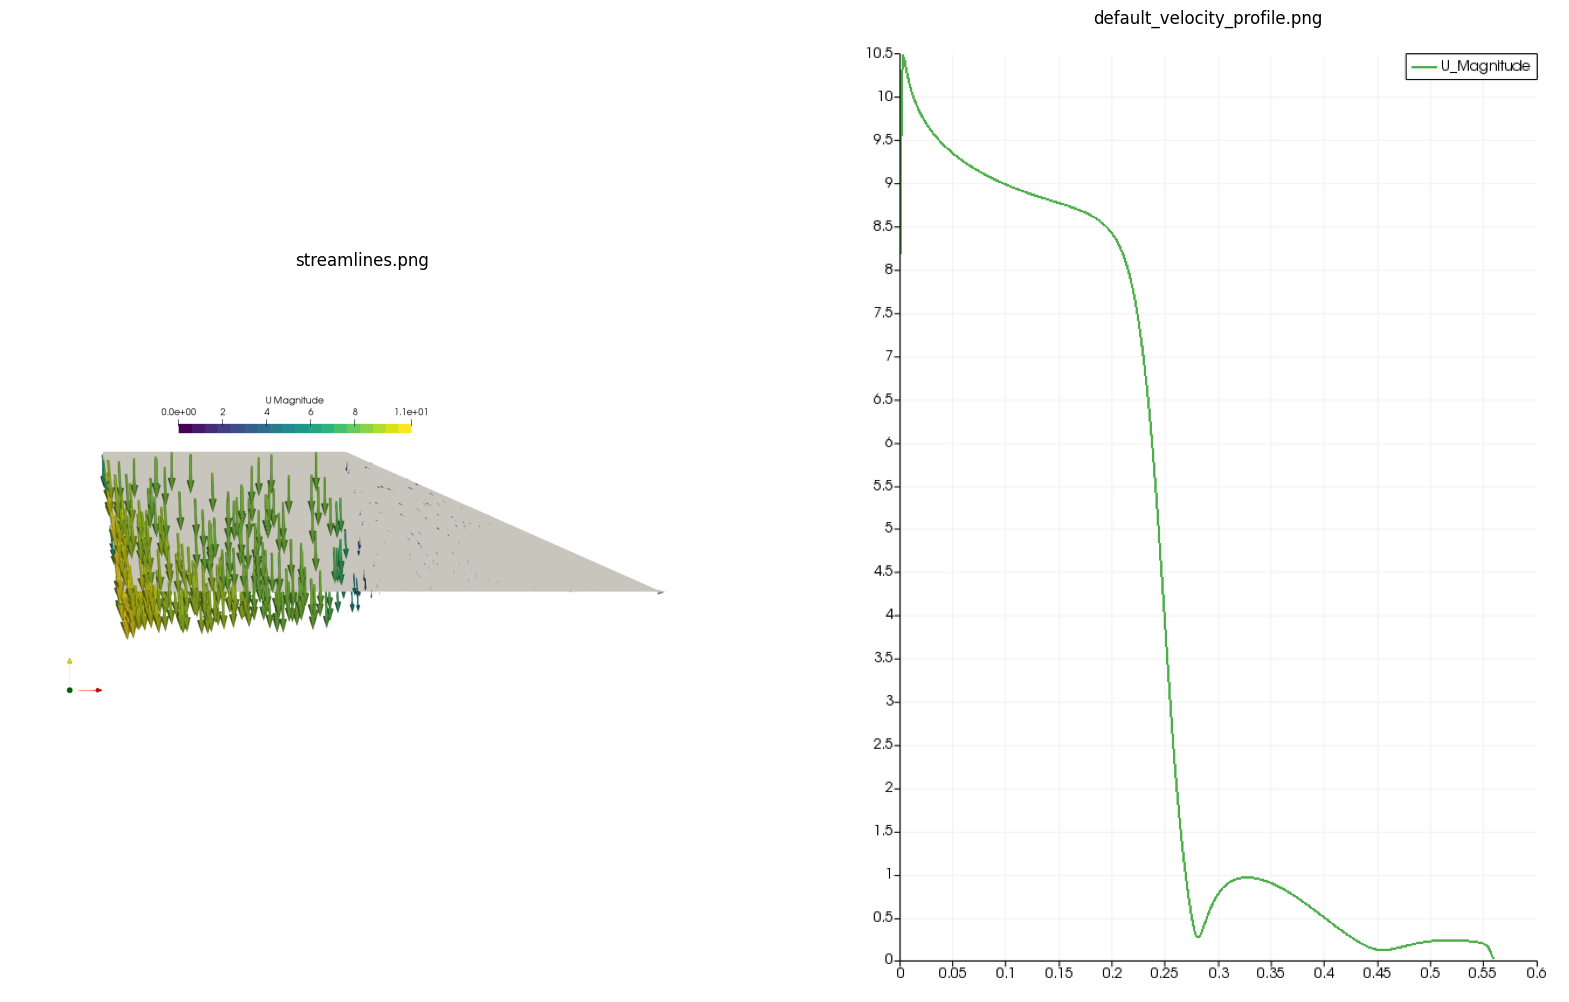

In [86]:
# Specify the directory where your CSV files are located
folder_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/data_files/CoV'

# List all CSV files in the directory
csv_files = sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])
print(csv_files)

CoV_inlet= []; CoV_outlet = []; UI_outlet = []; UI_inlet = []; Av_out_vels = [];


# Read the first CSV file with the full path

df = pd.read_csv(os.path.join(folder_path, csv_files[1]))
inlet_y_velocity = df.iloc[:,0]
outlet_velocity = df.iloc[:,1]
outlet_y_velocity = extract_y_component(outlet_velocity, 1)
outlet_x_velocity = extract_y_component(outlet_velocity, 0)
vel_mag = np.sqrt(outlet_x_velocity**2 + outlet_y_velocity**2)

CoV_outlet.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
CoV_inlet.append(np.abs(statistics.stdev(inlet_y_velocity) / np.mean(inlet_y_velocity)))
UI_outlet.append(np.abs(1-CoV_outlet[-1]))
UI_inlet.append(np.abs(1-CoV_inlet[-1]))
Av_out_vels.append(np.mean(vel_mag))


df = pd.read_csv(os.path.join(folder_path, csv_files[5]))
inlet_y_velocity = df.iloc[:,0]
outlet_velocity = df.iloc[:,1]
outlet_y_velocity = extract_y_component(outlet_velocity, 1)
outlet_x_velocity = extract_y_component(outlet_velocity, 0)
vel_mag = np.sqrt(outlet_x_velocity**2 + outlet_y_velocity**2)

CoV_outlet.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
CoV_inlet.append(np.abs(statistics.stdev(inlet_y_velocity) / np.mean(inlet_y_velocity)))
UI_outlet.append(np.abs(1-CoV_outlet[-1]))
UI_inlet.append(np.abs(1-CoV_inlet[-1]))
Av_out_vels.append(np.mean(vel_mag))



df = pd.read_csv(os.path.join(folder_path, csv_files[11]))
inlet_y_velocity = df.iloc[:,0]
outlet_velocity = df.iloc[:,1]
outlet_y_velocity = extract_y_component(outlet_velocity, 1)
outlet_x_velocity = extract_y_component(outlet_velocity, 0)
vel_mag = np.sqrt(outlet_x_velocity**2 + outlet_y_velocity**2)

CoV_outlet.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
CoV_inlet.append(np.abs(statistics.stdev(inlet_y_velocity) / np.mean(inlet_y_velocity)))
UI_outlet.append(np.abs(1-CoV_outlet[-1]))
UI_inlet.append(np.abs(1-CoV_inlet[-1]))
Av_out_vels.append(np.mean(vel_mag))



# Convert each element to a standard Python float
CoV_inlet = [float(value) for value in CoV_inlet]; CoV_outlet = [float(value) for value in CoV_outlet]
UI_inlet = [float(value) for value in UI_inlet]; UI_outlet = [float(value) for value in UI_outlet]

print("\n"*2)

names = ["27k_simple", "47k", "9k"]

df = pd.DataFrame({
    "Name": names,
    "CoV inlet": CoV_inlet,
    "CoV outlet": CoV_outlet,
    "UI inlet": UI_inlet,
    "UI outlet": UI_outlet,
    "Averaged outlet |U|": Av_out_vels
})

print(df)


# Specify the directory where your PNG files are located
image_dir = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/95k'
# List all files in the folder
files_image = os.listdir(image_dir)
# Filter out PNG files
png_files = sorted([f for f in files_image if f.endswith('.png')], reverse=False)
images = []

# Load the images and store them in the array
for png_file in png_files:
    full_image_path = os.path.join(image_dir, png_file)  # Use a new variable to store the full path
    image = Image.open(full_image_path)
    images.append(np.array(image))

fig, axes = plt.subplots(1, 2, figsize=(20, 20))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [3, 1]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

#### Optimized Trials

#### Straight Vanes

##### 1 vanes

       Name  CoV outlet  UI outlet  Average |U|
0  Outlet 1    0.922198   0.077802     4.368625
1  Outlet 2    0.783336   0.216664     8.316200
2   Overall    0.906468   0.093532     6.352967



Overall standard deviation at outlet:  5.7587632719856385


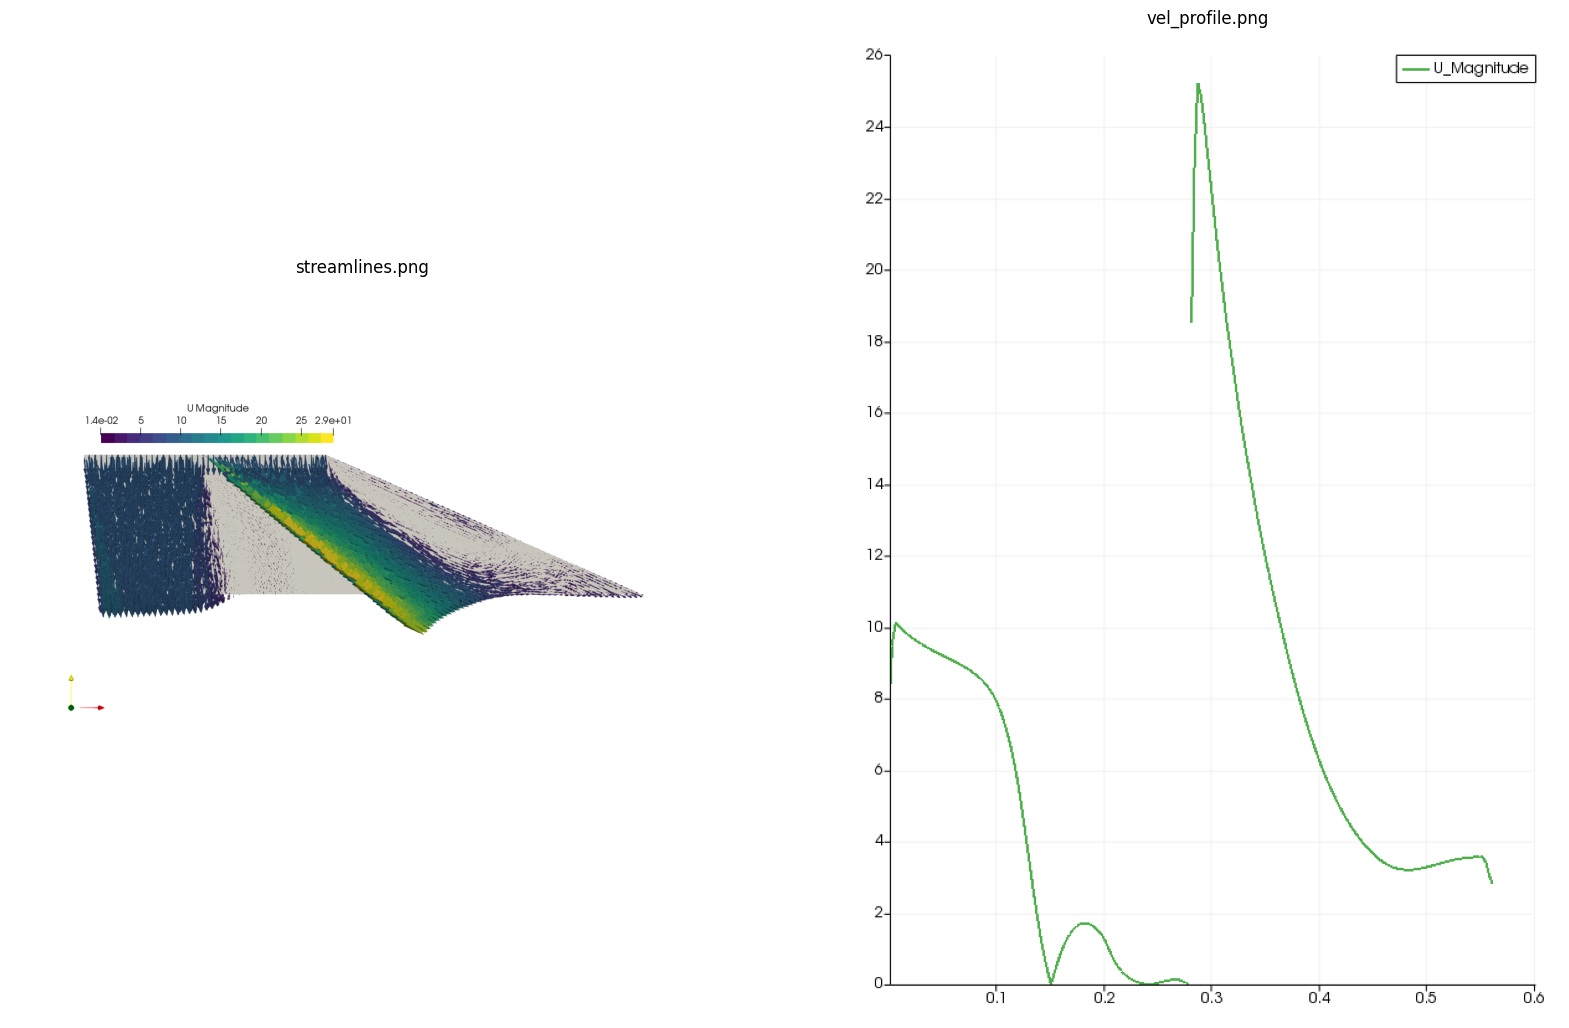

In [87]:
CoV_outlets = []; UI_outlets = []; averaged_velocities = [];

df = pd.read_csv(os.path.join(folder_path, csv_files[0]))


outlet_1= df.iloc[0:93,0]
outlet_y = extract_y_component(outlet_1, 1)
outlet_x = extract_y_component(outlet_1, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_2 = df.iloc[0:94,1] 
outlet_y = extract_y_component(outlet_2, 1) 
outlet_x = extract_y_component(outlet_2, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))



outlet_overall = df.iloc[0:187,2]
outlet_y = extract_y_component(outlet_overall, 1)
outlet_x = extract_y_component(outlet_overall, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))
std_dev = statistics.stdev(vel_mag)

# Convert each element to a standard Python float
CoV_outlets = [float(value) for value in CoV_outlets];
UI_outlets = [float(value) for value in UI_outlets];

names = ["Outlet 1", "Outlet 2", "Overall"]

df = pd.DataFrame({
    "Name": names,
    "CoV outlet": CoV_outlets,
    "UI outlet": UI_outlets, 
    "Average |U|": averaged_velocities
})

print(df)
print("\n"*2)
print("Overall standard deviation at outlet: ", std_dev)




# Specify the directory where your PNG files are located
image_dir = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/1vanes_2.0'
# List all files in the folder
files_image = os.listdir(image_dir)
# Filter out PNG files
png_files = sorted([f for f in files_image if f.endswith('.png')], reverse=False)
images = []

# Load the images and store them in the array
for png_file in png_files:
    full_image_path = os.path.join(image_dir, png_file)  # Use a new variable to store the full path
    image = Image.open(full_image_path)
    images.append(np.array(image))

fig, axes = plt.subplots(1, 2, figsize=(20, 20))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [2, 3]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

##### 2 vanes

       Name  CoV outlet  UI outlet  Average |U|
0  Outlet 1    0.852741   0.147259     4.450994
1  Outlet 2    0.859239   0.140761     6.234914
2  Outlet 3    0.711248   0.288752     9.250173
3   Overall    0.855823   0.144177     6.675414



Overall standard deviation at outlet:  5.712974307291268


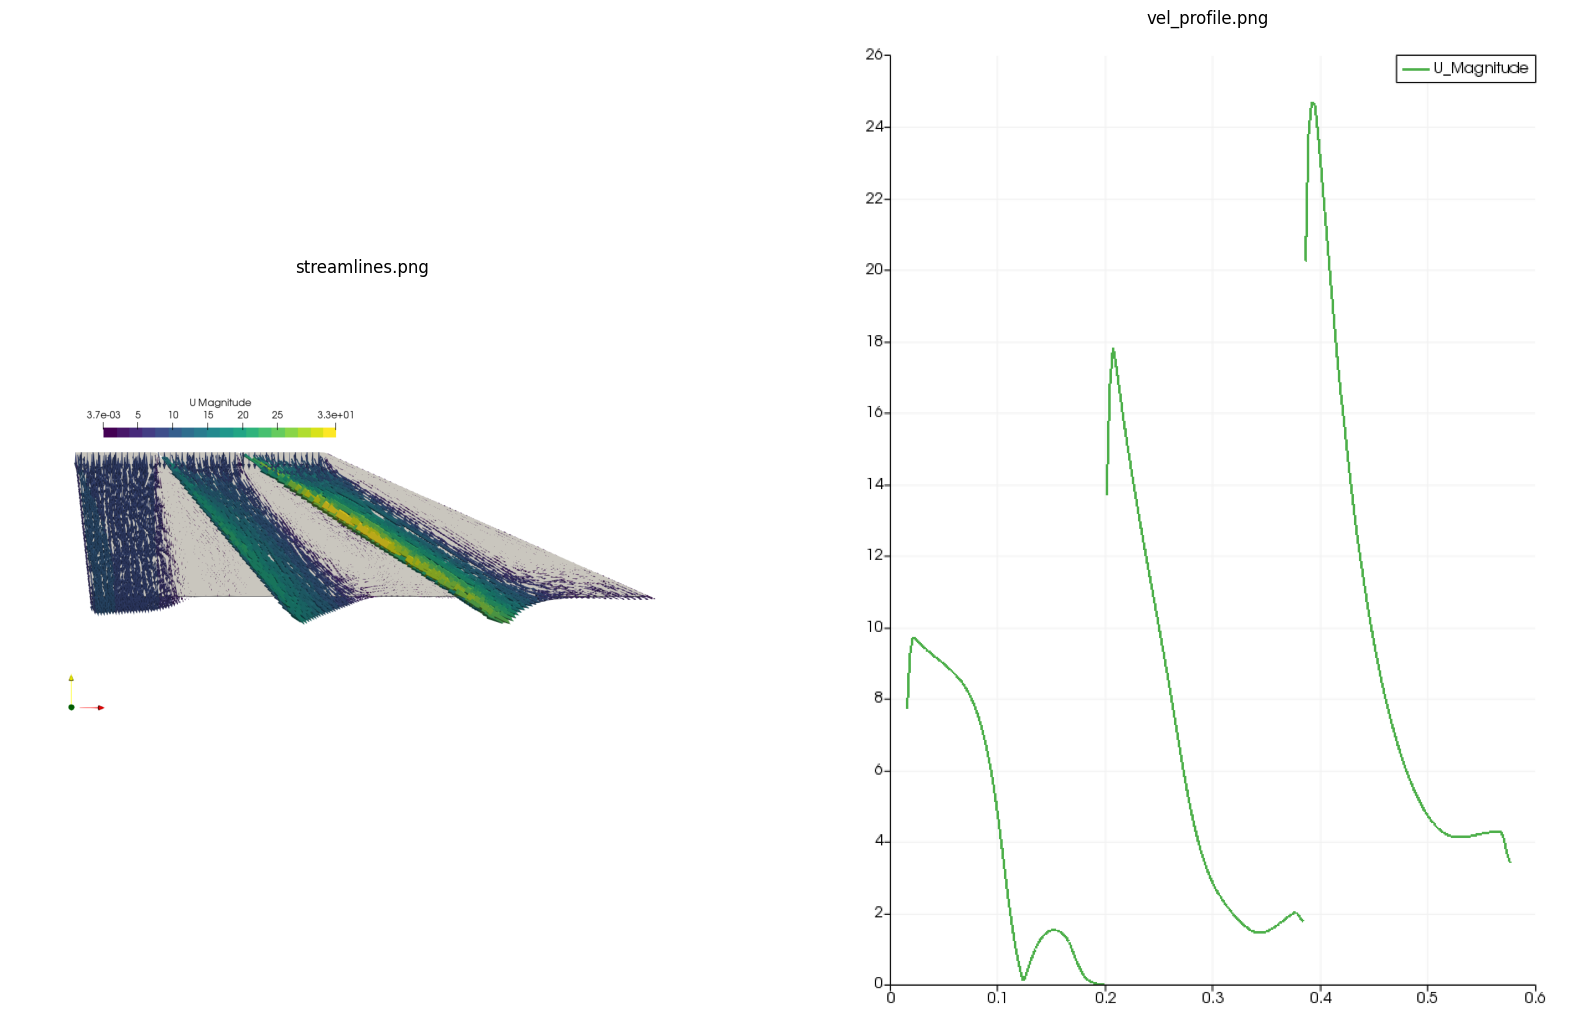

In [88]:
CoV_outlets = []; UI_outlets = []; averaged_velocities = [];

df = pd.read_csv(os.path.join(folder_path, csv_files[2]))


outlet_1= df.iloc[0:62,0]
outlet_y = extract_y_component(outlet_1, 1)
outlet_x = extract_y_component(outlet_1, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_2 = df.iloc[0:61,1] 
outlet_y = extract_y_component(outlet_2, 1) 
outlet_x = extract_y_component(outlet_2, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_3 = df.iloc[0:64,2];
outlet_y = extract_y_component(outlet_3, 1)
outlet_x = extract_y_component(outlet_3, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_overall = df.iloc[0:187,3]
outlet_y = extract_y_component(outlet_overall, 1)
outlet_x = extract_y_component(outlet_overall, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))
std_dev = statistics.stdev(vel_mag)

# Convert each element to a standard Python float
CoV_outlets = [float(value) for value in CoV_outlets];
UI_outlets = [float(value) for value in UI_outlets];

names = ["Outlet 1", "Outlet 2", "Outlet 3", "Overall"]

df = pd.DataFrame({
    "Name": names,
    "CoV outlet": CoV_outlets,
    "UI outlet": UI_outlets, 
    "Average |U|": averaged_velocities
})

print(df)
print("\n"*2)
print("Overall standard deviation at outlet: ", std_dev)




# Specify the directory where your PNG files are located
image_dir = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/2vanes_2.0'
# List all files in the folder
files_image = os.listdir(image_dir)
# Filter out PNG files
png_files = sorted([f for f in files_image if f.endswith('.png')], reverse=False)
images = []

# Load the images and store them in the array
for png_file in png_files:
    full_image_path = os.path.join(image_dir, png_file)  # Use a new variable to store the full path
    image = Image.open(full_image_path)
    images.append(np.array(image))

fig, axes = plt.subplots(1, 2, figsize=(20, 20))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [2, 3]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

##### 3 vanes

       Name  CoV outlet  UI outlet  Average |U|
0  Outlet 1    0.824156   0.175844     4.190964
1  Outlet 2    0.873302   0.126698     5.335750
2  Outlet 3    0.828877   0.171123     6.944712
3  Outlet 4    0.662773   0.337227     9.814334
4   Overall    0.851491   0.148509     6.576077



Overall standard deviation at outlet:  5.599467408010436


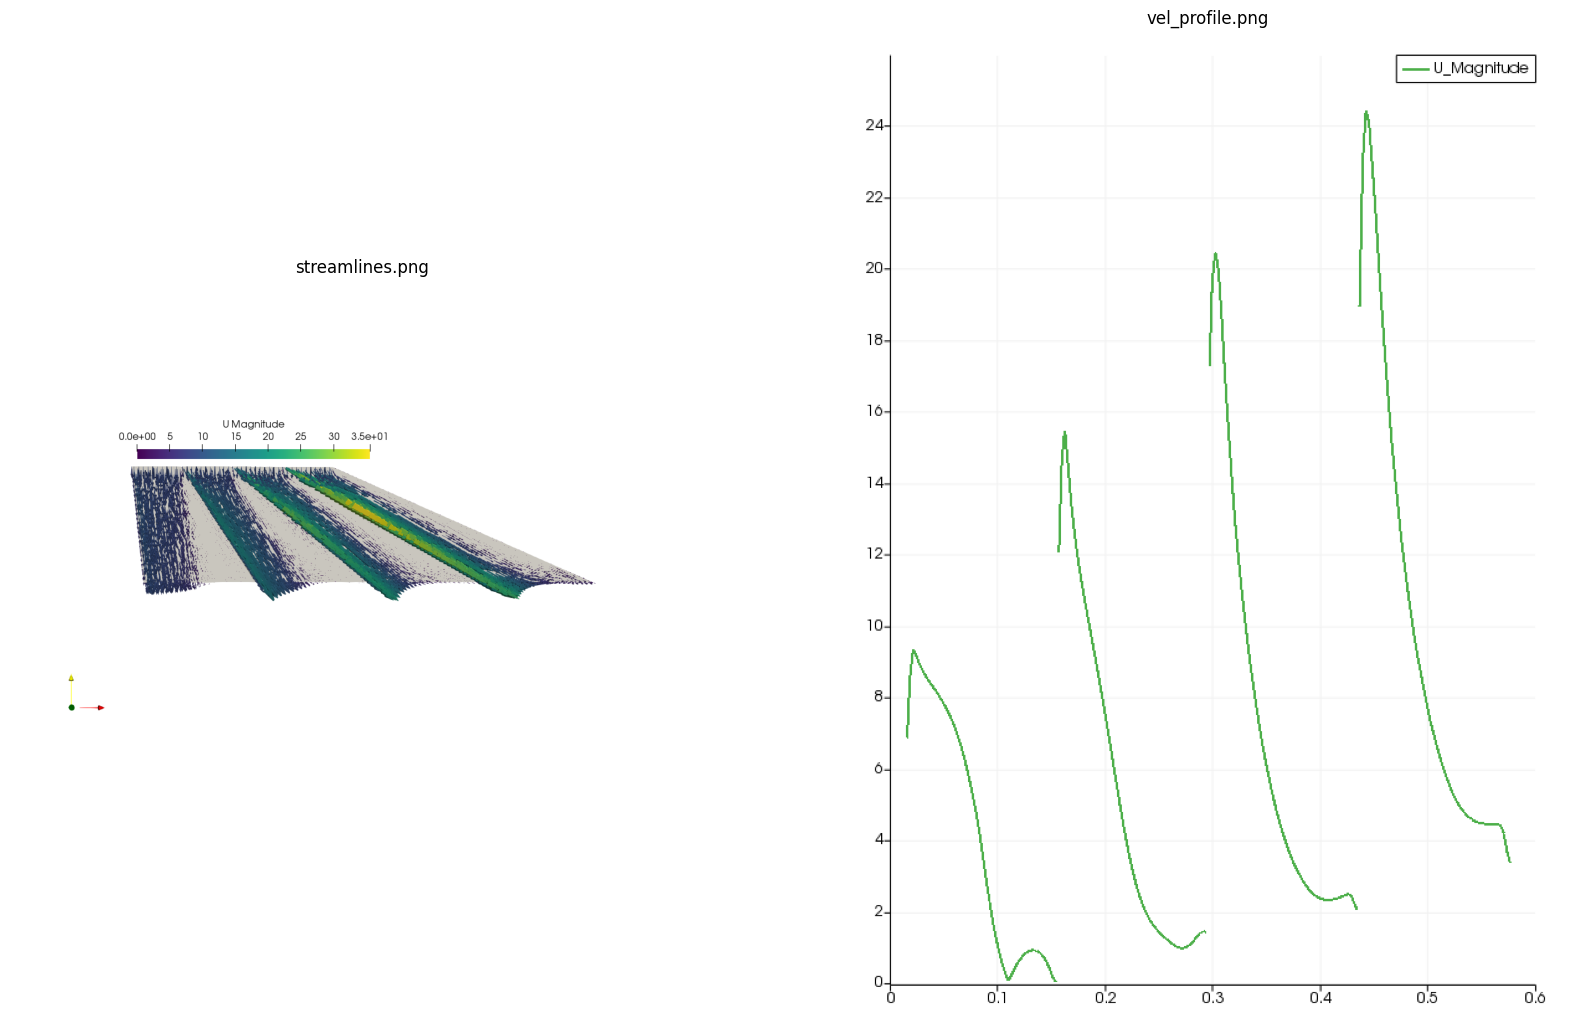

In [89]:
CoV_outlets = []; UI_outlets = []; averaged_velocities = [];

df = pd.read_csv(os.path.join(folder_path, csv_files[4]))


outlet_1= df.iloc[0:47,0]
outlet_y = extract_y_component(outlet_1, 1)
outlet_x = extract_y_component(outlet_1, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_2 = df.iloc[0:46,1] 
outlet_y = extract_y_component(outlet_2, 1) 
outlet_x = extract_y_component(outlet_2, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_3 = df.iloc[0:46,2];
outlet_y = extract_y_component(outlet_3, 1)
outlet_x = extract_y_component(outlet_3, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_4 = df.iloc[0:47,3]
outlet_y = extract_y_component(outlet_4, 1)
outlet_x = extract_y_component(outlet_4, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2) 
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_overall = df.iloc[0:186,4]
outlet_y = extract_y_component(outlet_overall, 1)
outlet_x = extract_y_component(outlet_overall, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))
std_dev = statistics.stdev(vel_mag)

# Convert each element to a standard Python float
CoV_outlets = [float(value) for value in CoV_outlets];
UI_outlets = [float(value) for value in UI_outlets];

names = ["Outlet 1", "Outlet 2", "Outlet 3", "Outlet 4", "Overall"]

df = pd.DataFrame({
    "Name": names,
    "CoV outlet": CoV_outlets,
    "UI outlet": UI_outlets, 
    "Average |U|": averaged_velocities
})

print(df)
print("\n"*2)
print("Overall standard deviation at outlet: ", std_dev)




# Specify the directory where your PNG files are located
image_dir = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/3vanes_1.0'
# List all files in the folder
files_image = os.listdir(image_dir)
# Filter out PNG files
png_files = sorted([f for f in files_image if f.endswith('.png')], reverse=False)
images = []

# Load the images and store them in the array
for png_file in png_files:
    full_image_path = os.path.join(image_dir, png_file)  # Use a new variable to store the full path
    image = Image.open(full_image_path)
    images.append(np.array(image))

fig, axes = plt.subplots(1, 2, figsize=(20, 20))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [2, 3]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

##### 4 vanes

       Name  CoV outlet  UI outlet  Average |U|
0  Outlet 1    0.691918   0.308082     3.892001
1  Outlet 2    0.775881   0.224119     4.829728
2  Outlet 3    0.678245   0.321755     6.128381
3  Outlet 4    0.624222   0.375778     7.465933
4  Outlet 5    0.471723   0.528277     9.406197
5   Overall    0.694537   0.305463     6.360909



Overall standard deviation at outlet:  4.417883485684342


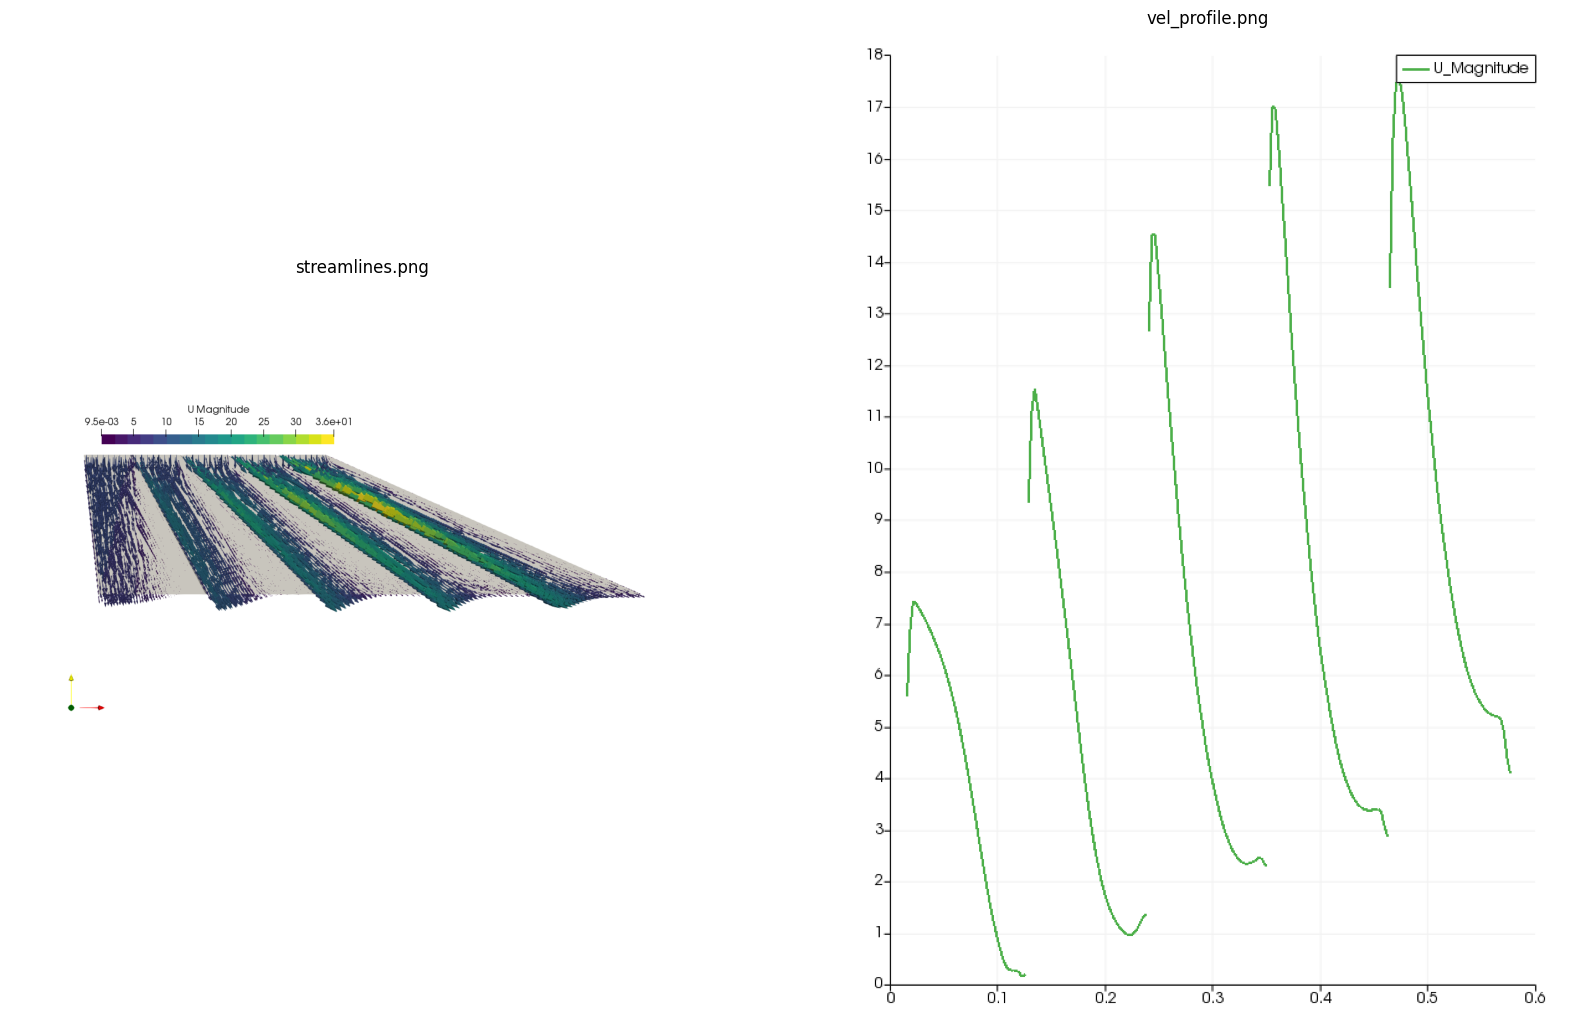

In [90]:
CoV_outlets = []; UI_outlets = []; averaged_velocities = [];

df = pd.read_csv(os.path.join(folder_path, csv_files[7]))


outlet_1= df.iloc[0:37,0]
outlet_y = extract_y_component(outlet_1, 1)
outlet_x = extract_y_component(outlet_1, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_2 = df.iloc[0:37,1] 
outlet_y = extract_y_component(outlet_2, 1) 
outlet_x = extract_y_component(outlet_2, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_3 = df.iloc[0:37,2];
outlet_y = extract_y_component(outlet_3, 1)
outlet_x = extract_y_component(outlet_3, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_4 = df.iloc[0:37,3]
outlet_y = extract_y_component(outlet_4, 1)
outlet_x = extract_y_component(outlet_4, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2) 
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_5 = df.iloc[0:38,4]
outlet_y = extract_y_component(outlet_5, 1) 
outlet_x = extract_y_component(outlet_5, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))



outlet_overall = df.iloc[0:186,5]
outlet_y = extract_y_component(outlet_overall, 1)
outlet_x = extract_y_component(outlet_overall, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))
std_dev = statistics.stdev(vel_mag)

# Convert each element to a standard Python float
CoV_outlets = [float(value) for value in CoV_outlets];
UI_outlets = [float(value) for value in UI_outlets];

names = ["Outlet 1", "Outlet 2", "Outlet 3", "Outlet 4", "Outlet 5", "Overall"]

df = pd.DataFrame({
    "Name": names,
    "CoV outlet": CoV_outlets,
    "UI outlet": UI_outlets, 
    "Average |U|": averaged_velocities
})

print(df)
print("\n"*2)
print("Overall standard deviation at outlet: ", std_dev)




# Specify the directory where your PNG files are located
image_dir = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/4vanes_2.0'
# List all files in the folder
files_image = os.listdir(image_dir)
# Filter out PNG files
png_files = sorted([f for f in files_image if f.endswith('.png')], reverse=False)
images = []

# Load the images and store them in the array
for png_file in png_files:
    full_image_path = os.path.join(image_dir, png_file)  # Use a new variable to store the full path
    image = Image.open(full_image_path)
    images.append(np.array(image))

fig, axes = plt.subplots(1, 2, figsize=(20, 20))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [2, 3]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

##### 5 vanes

       Name  CoV outlet  UI outlet  Average |U|
0  Outlet 1    0.426613   0.573387     3.851448
1  Outlet 2    0.663340   0.336660     4.443428
2  Outlet 3    0.645332   0.354668     5.421060
3  Outlet 4    0.588624   0.411376     6.611367
4  Outlet 5    0.443287   0.556713     7.958898
5  Outlet 6    0.394364   0.605636     9.170063
6   Overall    0.598576   0.401424     6.258365



Overall standard deviation at outlet:  3.74611003696005


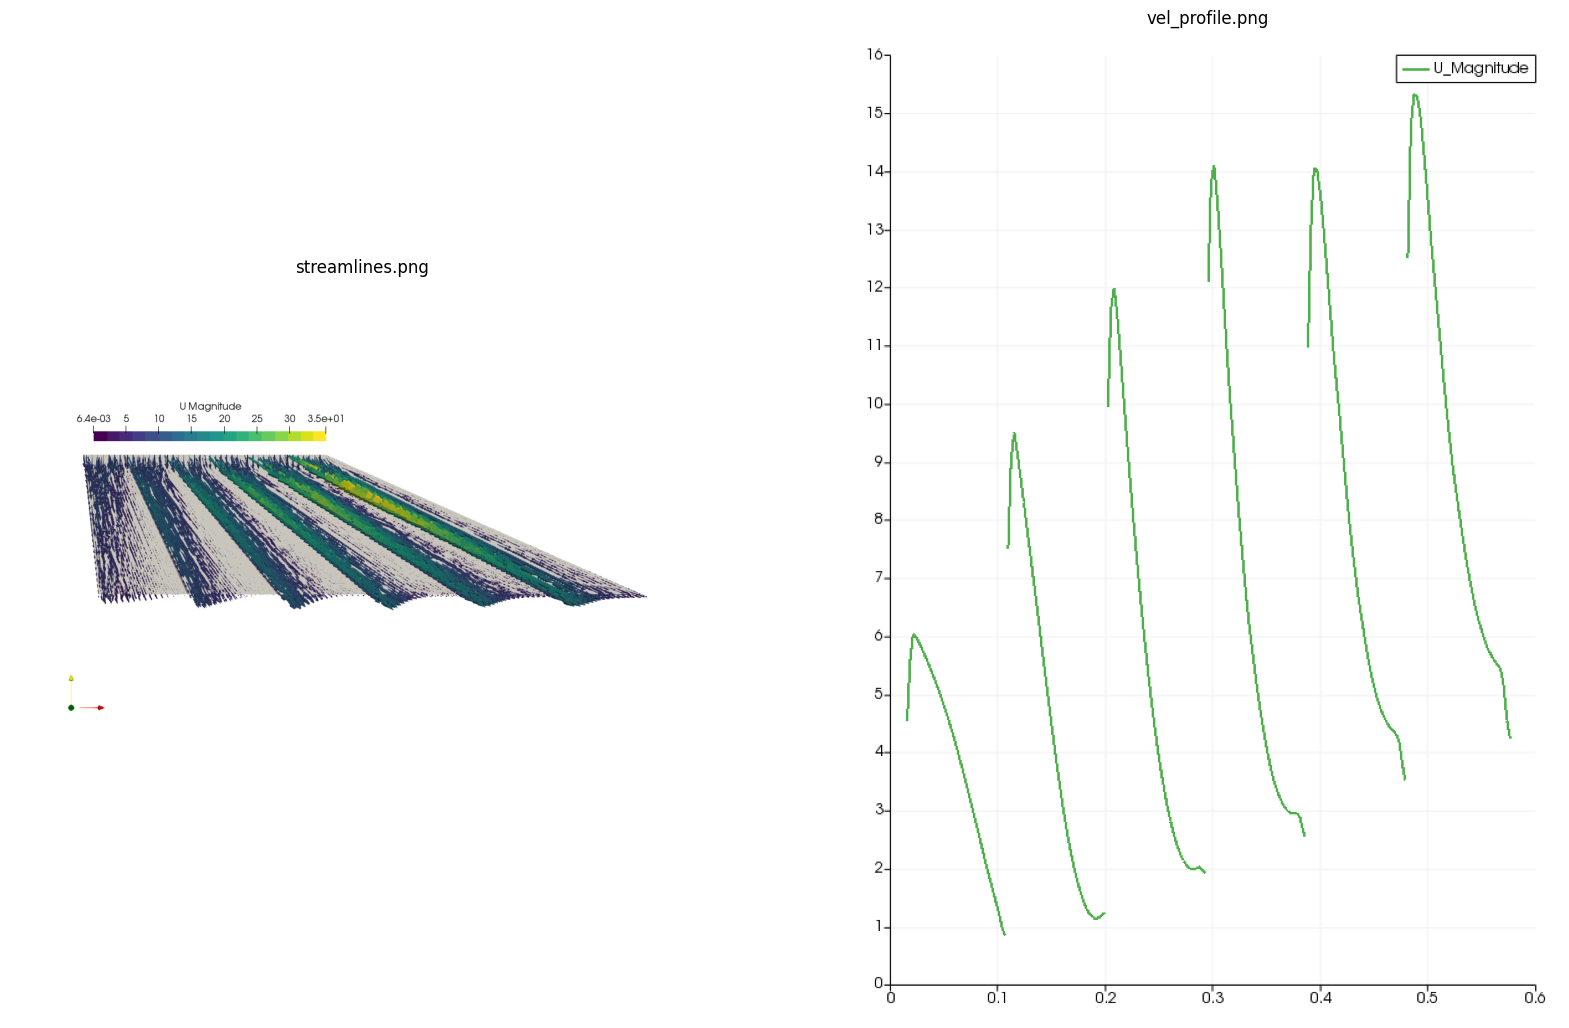

In [91]:
CoV_outlets = []; UI_outlets = []; averaged_velocities = [];

df = pd.read_csv(os.path.join(folder_path, csv_files[9]))


outlet_1= df.iloc[0:31,0]
outlet_y = extract_y_component(outlet_1, 1)
outlet_x = extract_y_component(outlet_1, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_2 = df.iloc[0:31,1] 
outlet_y = extract_y_component(outlet_2, 1) 
outlet_x = extract_y_component(outlet_2, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_3 = df.iloc[0:31,2];
outlet_y = extract_y_component(outlet_3, 1)
outlet_x = extract_y_component(outlet_3, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_4 = df.iloc[0:31,3]
outlet_y = extract_y_component(outlet_4, 1)
outlet_x = extract_y_component(outlet_4, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2) 
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_5 = df.iloc[0:31,4]
outlet_y = extract_y_component(outlet_5, 1) 
outlet_x = extract_y_component(outlet_5, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_6 = df.iloc[0:32,5]
outlet_y = extract_y_component(outlet_6, 1)
outlet_x = extract_y_component(outlet_6, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_overall = df.iloc[0:187,6]
outlet_y = extract_y_component(outlet_overall, 1)
outlet_x = extract_y_component(outlet_overall, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))
std_dev = statistics.stdev(vel_mag)

# Convert each element to a standard Python float
CoV_outlets = [float(value) for value in CoV_outlets];
UI_outlets = [float(value) for value in UI_outlets];

names = ["Outlet 1", "Outlet 2", "Outlet 3", "Outlet 4", "Outlet 5", "Outlet 6", "Overall"]

df = pd.DataFrame({
    "Name": names,
    "CoV outlet": CoV_outlets,
    "UI outlet": UI_outlets, 
    "Average |U|": averaged_velocities
})

print(df)
print("\n"*2)
print("Overall standard deviation at outlet: ", std_dev)




# Specify the directory where your PNG files are located
image_dir = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/5vanes_2.0'
# List all files in the folder
files_image = os.listdir(image_dir)
# Filter out PNG files
png_files = sorted([f for f in files_image if f.endswith('.png')], reverse=False)
images = []

# Load the images and store them in the array
for png_file in png_files:
    full_image_path = os.path.join(image_dir, png_file)  # Use a new variable to store the full path
    image = Image.open(full_image_path)
    images.append(np.array(image))

fig, axes = plt.subplots(1, 2, figsize=(20, 20))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [2, 3]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

##### 6 vanes

       Name  CoV outlet  UI outlet  Average |U|
0  Outlet 1    0.390937   0.609063     3.827527
1  Outlet 2    0.561299   0.438701     4.221109
2  Outlet 3    0.599417   0.400583     4.995574
3  Outlet 4    0.545441   0.454559     5.934783
4  Outlet 5    0.478087   0.521913     6.811395
5  Outlet 6    0.396384   0.603616     7.988102
6  Outlet 7    0.314042   0.685958     9.027146
7   Overall    0.543105   0.456895     6.129124



Overall standard deviation at outlet:  3.328757384300712


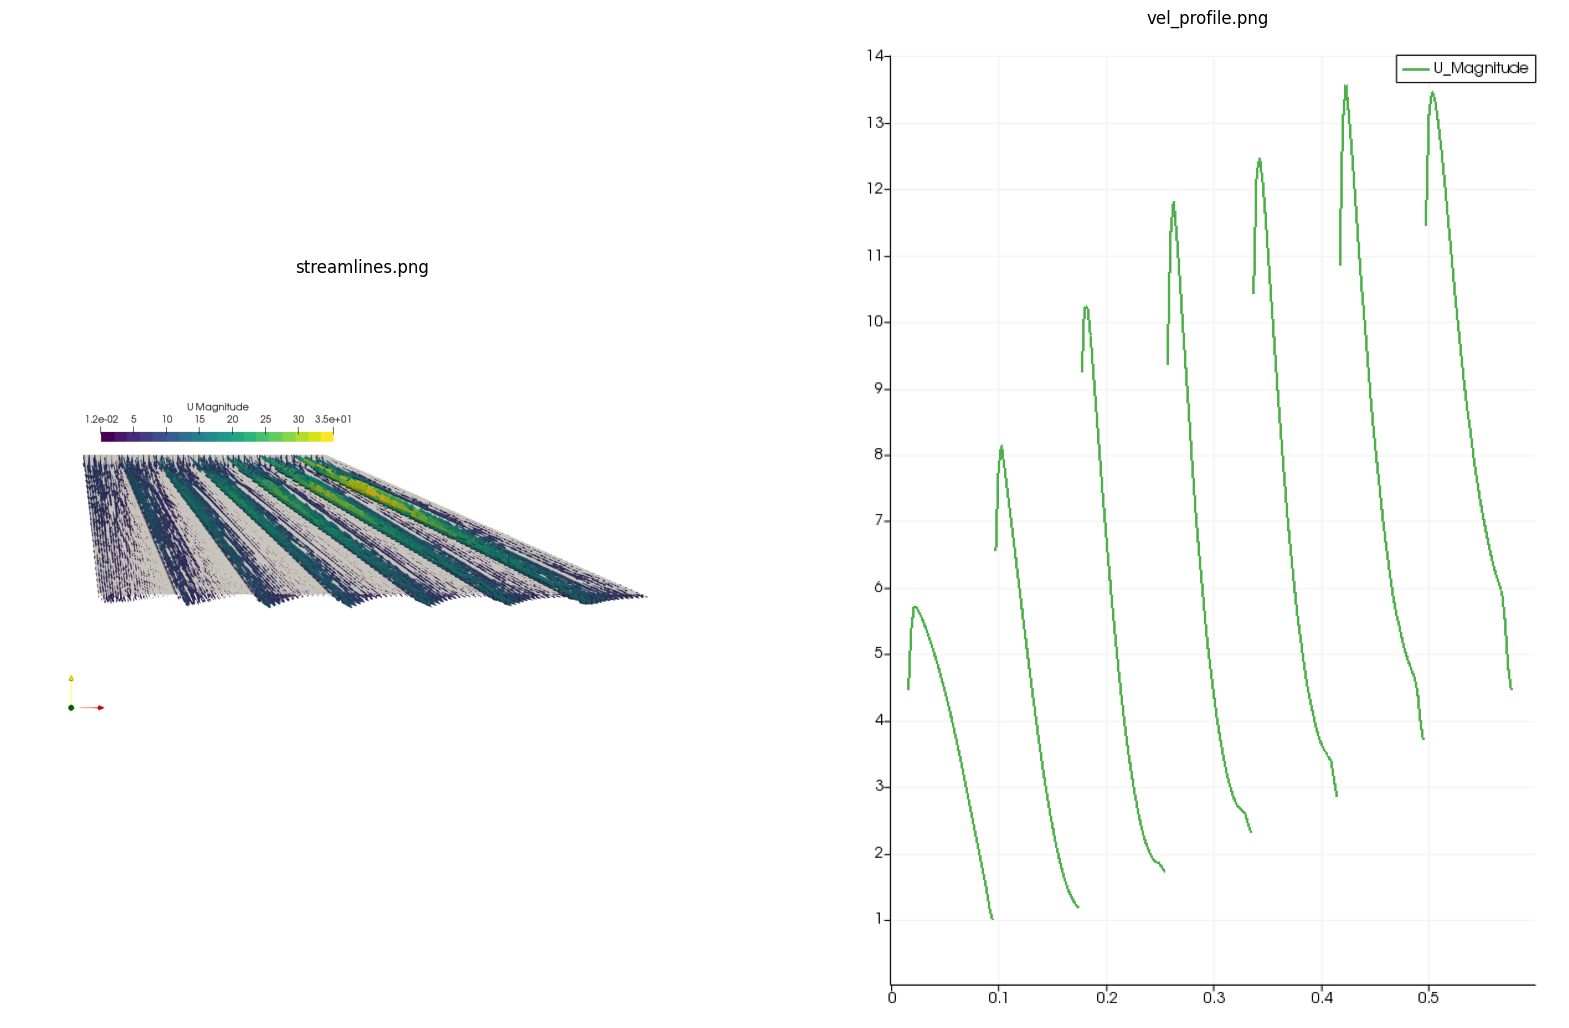

In [92]:
CoV_outlets = []; UI_outlets = []; averaged_velocities = [];

df = pd.read_csv(os.path.join(folder_path, csv_files[10]))


outlet_1= df.iloc[0:27,0]
outlet_y = extract_y_component(outlet_1, 1)
outlet_x = extract_y_component(outlet_1, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_2 = df.iloc[0:27,1] 
outlet_y = extract_y_component(outlet_2, 1) 
outlet_x = extract_y_component(outlet_2, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_3 = df.iloc[0:27,2];
outlet_y = extract_y_component(outlet_3, 1)
outlet_x = extract_y_component(outlet_3, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_4 = df.iloc[0:27,3]
outlet_y = extract_y_component(outlet_4, 1)
outlet_x = extract_y_component(outlet_4, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2) 
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_5 = df.iloc[0:27,4]
outlet_y = extract_y_component(outlet_5, 1) 
outlet_x = extract_y_component(outlet_5, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_6 = df.iloc[0:27,5]
outlet_y = extract_y_component(outlet_6, 1)
outlet_x = extract_y_component(outlet_6, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_7 = df.iloc[0:27,6]
outlet_y = extract_y_component(outlet_7, 1)
outlet_x = extract_y_component(outlet_7, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_overall = df.iloc[0:187,7]
outlet_y = extract_y_component(outlet_overall, 1)
outlet_x = extract_y_component(outlet_overall, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))
std_dev = statistics.stdev(vel_mag)

# Convert each element to a standard Python float
CoV_outlets = [float(value) for value in CoV_outlets];
UI_outlets = [float(value) for value in UI_outlets];

names = ["Outlet 1", "Outlet 2", "Outlet 3", "Outlet 4", "Outlet 5", "Outlet 6", "Outlet 7", "Overall"]

df = pd.DataFrame({
    "Name": names,
    "CoV outlet": CoV_outlets,
    "UI outlet": UI_outlets, 
    "Average |U|": averaged_velocities
})

print(df)
print("\n"*2)
print("Overall standard deviation at outlet: ", std_dev)




# Specify the directory where your PNG files are located
image_dir = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/6vanes_2.0'
# List all files in the folder
files_image = os.listdir(image_dir)
# Filter out PNG files
png_files = sorted([f for f in files_image if f.endswith('.png')], reverse=False)
images = []

# Load the images and store them in the array
for png_file in png_files:
    full_image_path = os.path.join(image_dir, png_file)  # Use a new variable to store the full path
    image = Image.open(full_image_path)
    images.append(np.array(image))

fig, axes = plt.subplots(1, 2, figsize=(20, 20))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [2, 3]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

#### Curved Vanes

##### 5 vanes

       Name  CoV outlet  UI outlet  Average |U|
0  Outlet 1    0.197198   0.802802     6.466683
1  Outlet 2    0.206664   0.793336     6.271923
2  Outlet 3    0.199192   0.800808     7.463329
3  Outlet 4    0.174362   0.825638     7.108253
4  Outlet 5    0.584173   0.415827     3.054828
5  Outlet 6    0.378748   0.621252     4.054448
6   Overall    0.398587   0.601413     5.510235



Overall standard deviation at outlet:  2.196307025269953


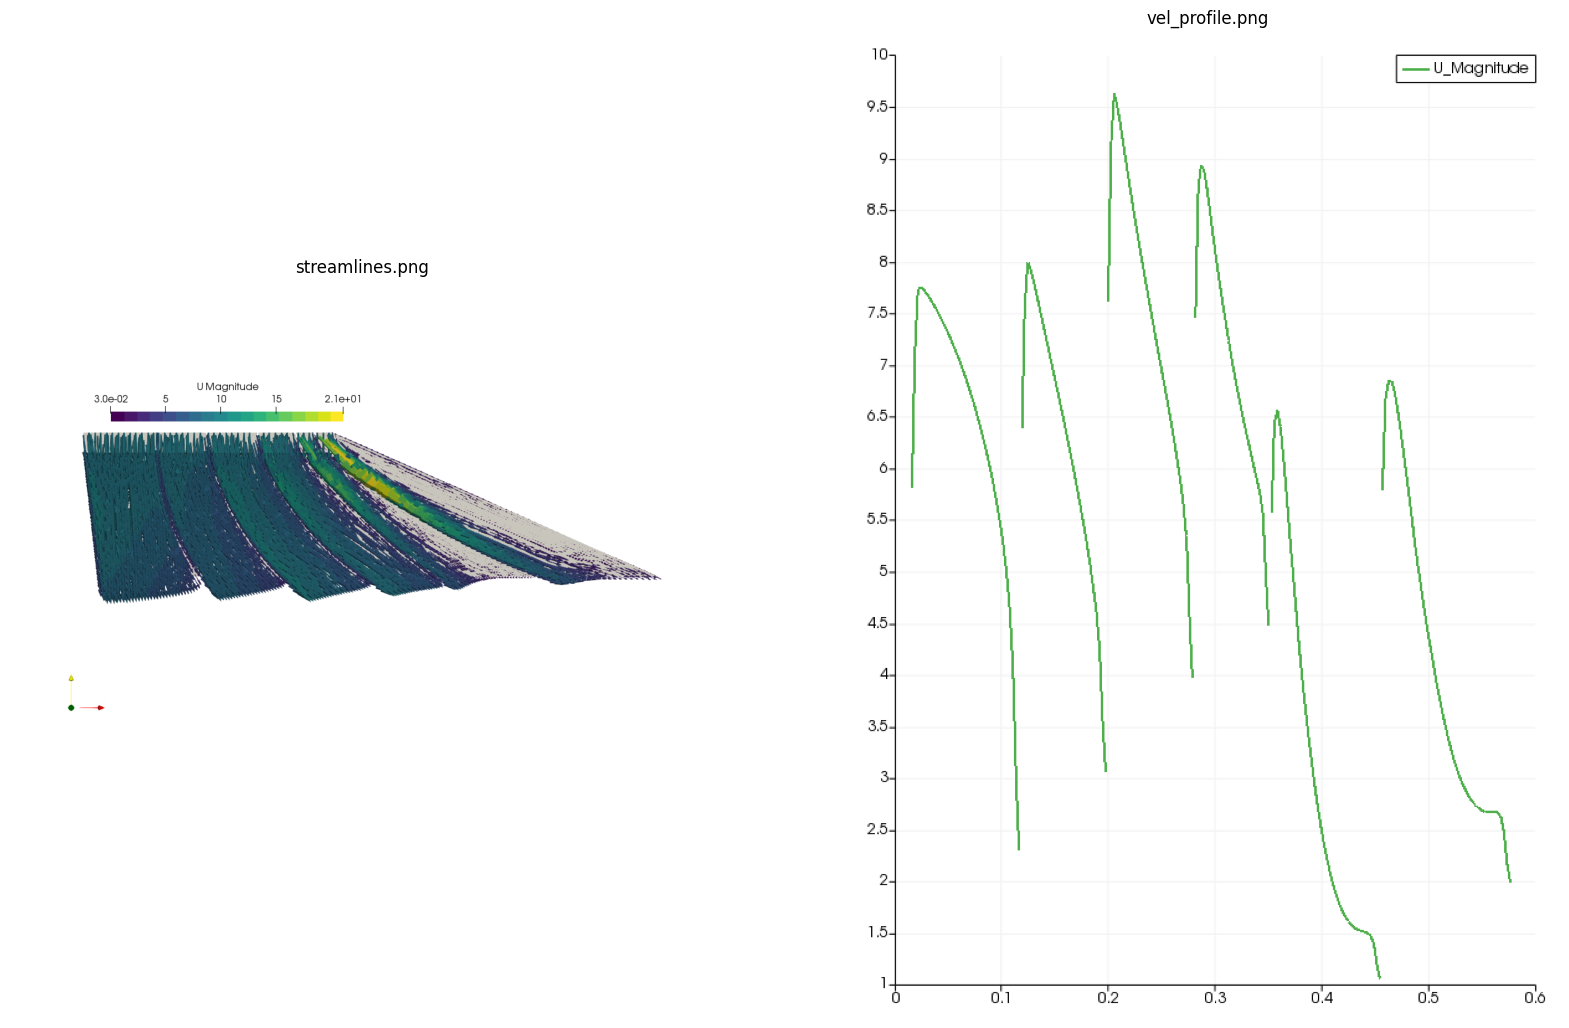

In [93]:
CoV_outlets = []; UI_outlets = []; averaged_velocities = [];

df = pd.read_csv(os.path.join(folder_path, csv_files[8]))


outlet_1= df.iloc[0:34,0]
outlet_y = extract_y_component(outlet_1, 1)
outlet_x = extract_y_component(outlet_1, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_2 = df.iloc[0:27,1] 
outlet_y = extract_y_component(outlet_2, 1) 
outlet_x = extract_y_component(outlet_2, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_3 = df.iloc[0:27,2];
outlet_y = extract_y_component(outlet_3, 1)
outlet_x = extract_y_component(outlet_3, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_4 = df.iloc[0:24,3]
outlet_y = extract_y_component(outlet_4, 1)
outlet_x = extract_y_component(outlet_4, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2) 
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_5 = df.iloc[0:35,4]
outlet_y = extract_y_component(outlet_5, 1) 
outlet_x = extract_y_component(outlet_5, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_6 = df.iloc[0:40,5]
outlet_y = extract_y_component(outlet_6, 1)
outlet_x = extract_y_component(outlet_6, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_overall = df.iloc[0:187,6]
outlet_y = extract_y_component(outlet_overall, 1)
outlet_x = extract_y_component(outlet_overall, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))
std_dev = statistics.stdev(vel_mag)

# Convert each element to a standard Python float
CoV_outlets = [float(value) for value in CoV_outlets];
UI_outlets = [float(value) for value in UI_outlets];

names = ["Outlet 1", "Outlet 2", "Outlet 3", "Outlet 4", "Outlet 5", "Outlet 6", "Overall"]

df = pd.DataFrame({
    "Name": names,
    "CoV outlet": CoV_outlets,
    "UI outlet": UI_outlets, 
    "Average |U|": averaged_velocities
})

print(df)
print("\n"*2)
print("Overall standard deviation at outlet: ", std_dev)




# Specify the directory where your PNG files are located
image_dir = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/Trial_5_curved/5_vanes_2.0'
# List all files in the folder
files_image = os.listdir(image_dir)
# Filter out PNG files
png_files = sorted([f for f in files_image if f.endswith('.png')], reverse=False)
images = []

# Load the images and store them in the array
for png_file in png_files:
    full_image_path = os.path.join(image_dir, png_file)  # Use a new variable to store the full path
    image = Image.open(full_image_path)
    images.append(np.array(image))

fig, axes = plt.subplots(1, 2, figsize=(20, 20))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [2, 3]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

##### 4 vanes

       Name  CoV outlet  UI outlet  Average |U|
0  Outlet 1    0.379640   0.620360     5.230574
1  Outlet 2    0.157574   0.842426     8.219553
2  Outlet 3    0.148035   0.851965     9.214272
3  Outlet 4    0.174362   0.825638     7.108253
4  Outlet 5    0.463839   0.536161     5.693457
5   Overall    0.382283   0.617717     6.514810



Overall standard deviation at outlet:  2.49050038614052


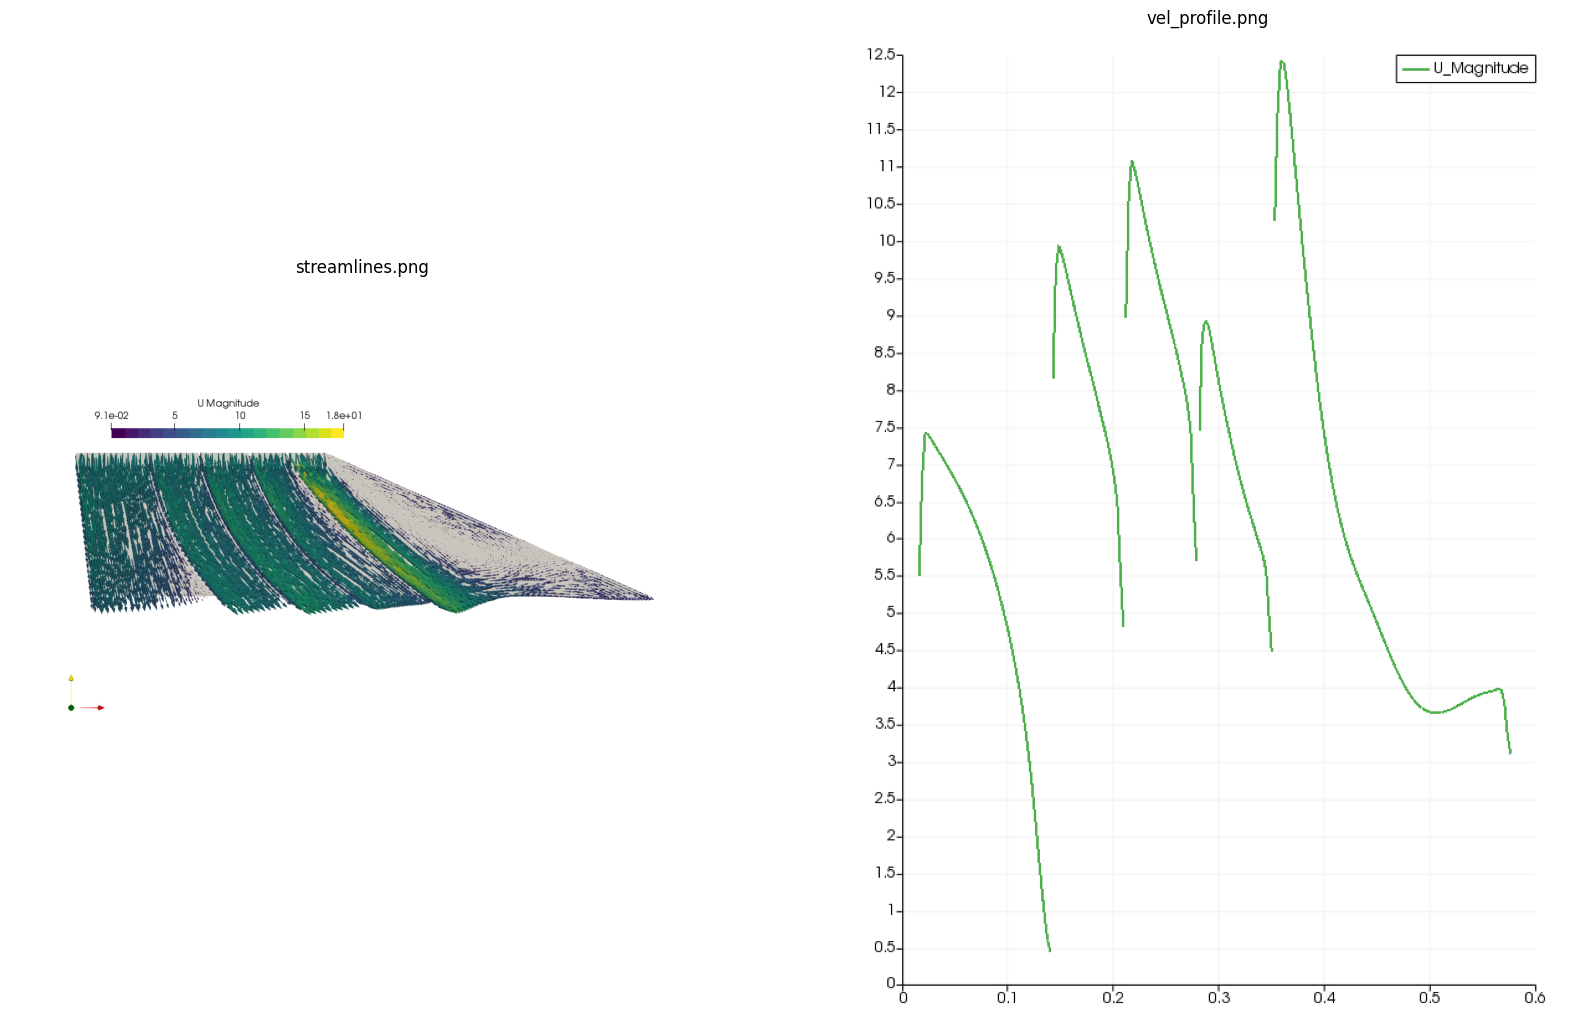

In [94]:
CoV_outlets = []; UI_outlets = []; averaged_velocities = [];


# Specify the directory where your CSV files are located
df = pd.read_csv(os.path.join(folder_path, csv_files[6]))


outlet_1= df.iloc[0:42,0]
outlet_y = extract_y_component(outlet_1, 1)
outlet_x = extract_y_component(outlet_1, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_2 = df.iloc[0:23,1] 
outlet_y = extract_y_component(outlet_2, 1) 
outlet_x = extract_y_component(outlet_2, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_3 = df.iloc[0:23,2];
outlet_y = extract_y_component(outlet_3, 1)
outlet_x = extract_y_component(outlet_3, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_4 = df.iloc[0:24,3]
outlet_y = extract_y_component(outlet_4, 1)
outlet_x = extract_y_component(outlet_4, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2) 
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_5 = df.iloc[0:75,4]
outlet_y = extract_y_component(outlet_5, 1) 
outlet_x = extract_y_component(outlet_5, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_overall = df.iloc[0:187,5]
outlet_y = extract_y_component(outlet_overall, 1) 
outlet_x = extract_y_component(outlet_overall, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))
std_dev = statistics.stdev(vel_mag)

# Convert each element to a standard Python float
CoV_outlets = [float(value) for value in CoV_outlets];
UI_outlets = [float(value) for value in UI_outlets];

names = ["Outlet 1", "Outlet 2", "Outlet 3", "Outlet 4", "Outlet 5", "Overall"]

df = pd.DataFrame({
    "Name": names,
    "CoV outlet": CoV_outlets,
    "UI outlet": UI_outlets, 
    "Average |U|": averaged_velocities
})

print(df)
print("\n"*2)
print("Overall standard deviation at outlet: ", std_dev)



# Specify the directory where your PNG files are located
image_dir = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/Trial_5_curved/2nd_order_4vanes_1.0'
# List all files in the folder
files_image = os.listdir(image_dir)
# Filter out PNG files
png_files = sorted([f for f in files_image if f.endswith('.png')], reverse=False)
images = []

# Load the images and store them in the array
for png_file in png_files:
    full_image_path = os.path.join(image_dir, png_file)  # Use a new variable to store the full path
    image = Image.open(full_image_path)
    images.append(np.array(image))

fig, axes = plt.subplots(1, 2, figsize=(20, 20))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [1, 2]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

##### 3 vanes

       Name  CoV outlet  UI outlet  Average |U|
0  Outlet 1    0.516176   0.483824     5.560290
1  Outlet 2    0.148035   0.851965     9.214269
2  Outlet 3    0.174511   0.825489     7.108418
3  Outlet 4    0.463987   0.536013     5.691252
4   Overall    0.437198   0.562802     6.260925



Overall standard deviation at outlet:  2.7372667641648096


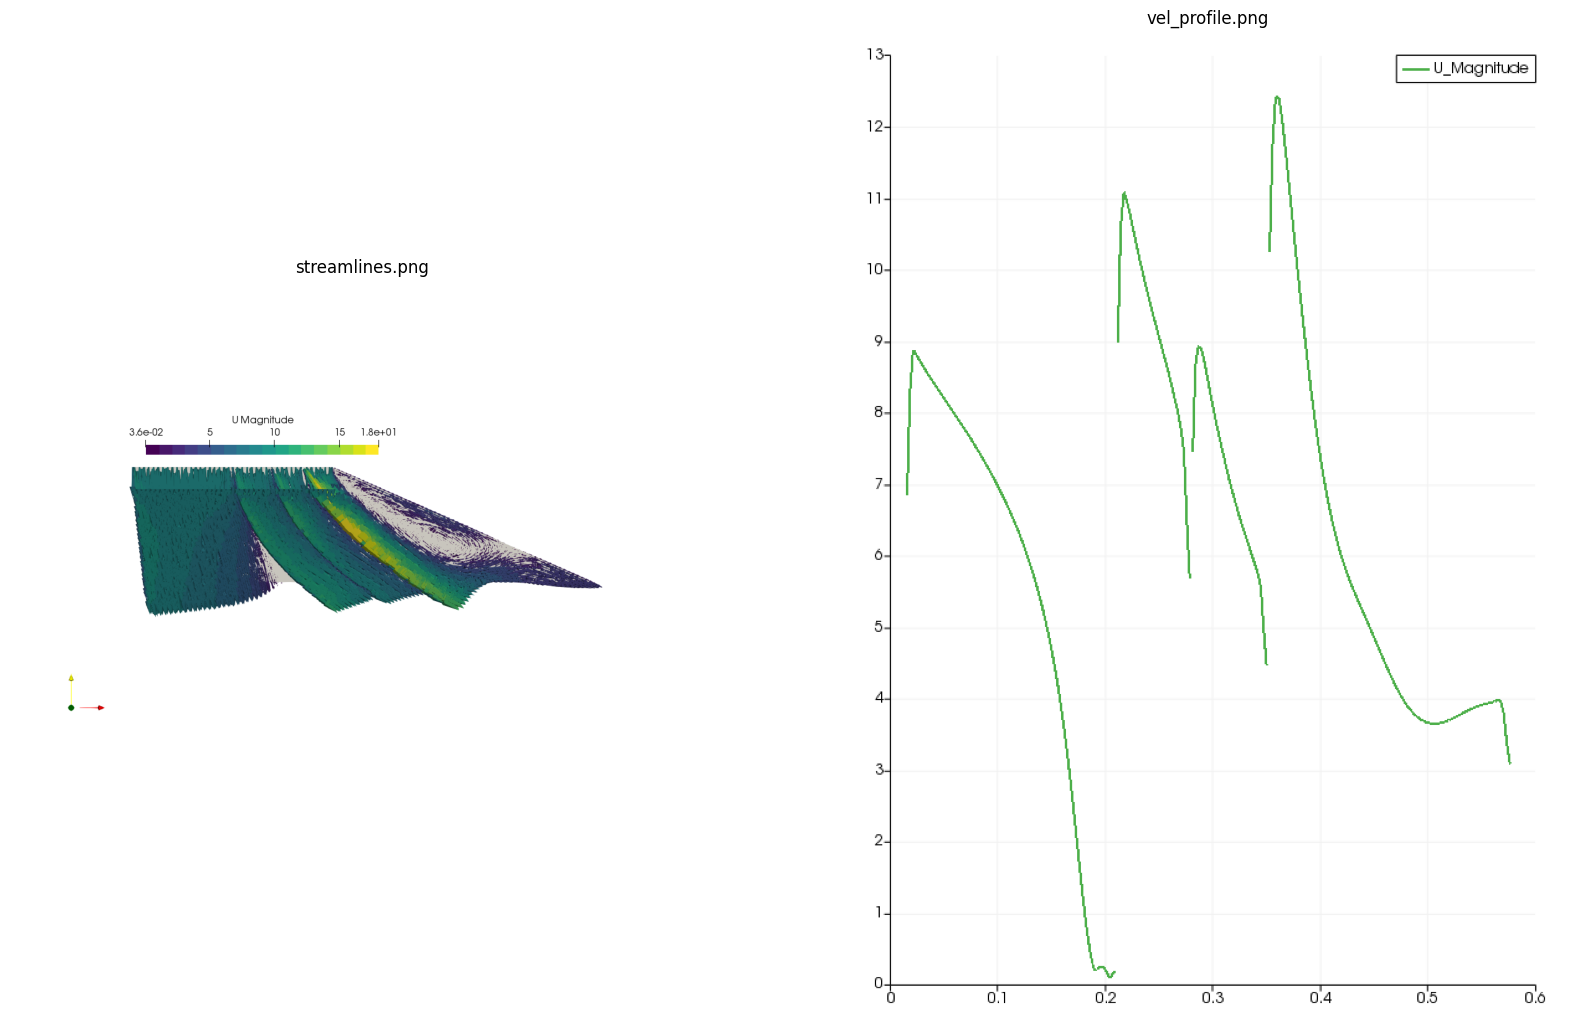

In [95]:
CoV_outlets = []; UI_outlets = []; averaged_velocities = [];


# Specify the directory where your CSV files are located
df = pd.read_csv(os.path.join(folder_path, csv_files[3]))


outlet_1= df.iloc[0:65,0]
outlet_y = extract_y_component(outlet_1, 1)
outlet_x = extract_y_component(outlet_1, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_2 = df.iloc[0:23,1] 
outlet_y = extract_y_component(outlet_2, 1) 
outlet_x = extract_y_component(outlet_2, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_3 = df.iloc[0:24,2];
outlet_y = extract_y_component(outlet_3, 1)
outlet_x = extract_y_component(outlet_3, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_4 = df.iloc[0:75,3]
outlet_y = extract_y_component(outlet_4, 1)
outlet_x = extract_y_component(outlet_4, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2) 
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_overall = df.iloc[0:187,4]
outlet_y = extract_y_component(outlet_overall, 1)
outlet_x = extract_y_component(outlet_overall, 0)
vel_mag = np.sqrt(outlet_y**2 + outlet_x**2) 
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))
std_dev = statistics.stdev(vel_mag)


# Convert each element to a standard Python float
CoV_outlets = [float(value) for value in CoV_outlets];
UI_outlets = [float(value) for value in UI_outlets];

names = ["Outlet 1", "Outlet 2", "Outlet 3", "Outlet 4", "Overall"]

df = pd.DataFrame({
    "Name": names,
    "CoV outlet": CoV_outlets,
    "UI outlet": UI_outlets, 
    "Average |U|": averaged_velocities
})

print(df)
print("\n"*2)
print("Overall standard deviation at outlet: ", std_dev)



# Specify the directory where your PNG files are located
image_dir = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/Trial_5_curved/3_vanes_2.0'
# List all files in the folder
files_image = os.listdir(image_dir)
# Filter out PNG files
png_files = sorted([f for f in files_image if f.endswith('.png')], reverse=False)
images = []

# Load the images and store them in the array
for png_file in png_files:
    full_image_path = os.path.join(image_dir, png_file)  # Use a new variable to store the full path
    image = Image.open(full_image_path)
    images.append(np.array(image))

fig, axes = plt.subplots(1, 2, figsize=(20, 20))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [0, 1]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

#### Optimized Trials

##### Noob

In [96]:
import gmsh
import os
import subprocess
import meshio
import numpy as np
import sys

def header():
    gmsh.initialize()
    gmsh.model.add("Header")


    lc = 3e-3; lc_boundary = 5e-2; z_coor = 0; scale = 1000;

    gmsh.model.geo.addPoint(675.044420652/scale, 941.810501494/scale, z_coor, lc, 1)
    gmsh.model.geo.addPoint(1001.29293311/scale, 797.332371989/scale, z_coor, lc, 2)
    gmsh.model.geo.addPoint(440.29388129/scale, 797.332371989/scale, z_coor, lc, 3)
    gmsh.model.geo.addPoint(425.148947625/scale, 941.810501494/scale, z_coor, lc, 4)

    # Adding 1 mm thick walls

    gmsh.model.geo.addPoint(425.148947625/scale + 0.75*0.249, 941.810501494/scale, z_coor, lc, 5)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.60*0.56, 797.332371989/scale, z_coor, lc, 6)

    gmsh.model.geo.addPoint(425.148947625/scale + 0.25*0.249, 941.810501494/scale, z_coor, lc, 7)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.20*0.56, 797.332371989/scale, z_coor, lc, 8)

    gmsh.model.geo.addLine(1, 2, 9)
    gmsh.model.geo.addLine(2, 6, 10)
    gmsh.model.geo.addLine(6, 8, 11)
    gmsh.model.geo.addLine(8, 3, 12)
    gmsh.model.geo.addLine(3, 4, 13)
    gmsh.model.geo.addLine(4, 7, 14)
    gmsh.model.geo.addLine(7, 5, 15)
    gmsh.model.geo.addLine(5, 1, 16)
    gmsh.model.geo.addLine(7, 8, 17)
    gmsh.model.geo.addLine(5, 6, 18)

    gmsh.model.geo.synchronize()

    gmsh.model.geo.addCurveLoop([14, 17, 12, 13], 1)
    gmsh.model.geo.addCurveLoop([15, 18, 11, -17], 2)
    gmsh.model.geo.addCurveLoop([16, 9, 10, -18], 3)

    gmsh.model.geo.addPlaneSurface([1], 4)
    gmsh.model.geo.addPlaneSurface([2], 5)
    gmsh.model.geo.addPlaneSurface([3], 6)


    # for l in [8]:
    #     gmsh.model.geo.mesh.setTransfiniteCurve(l, 100, "Progression", 1)
    # for l in [5]:
    #     gmsh.model.geo.mesh.setTransfiniteCurve(l, 200, "Progression", 1)
    # for l in [7, 6]:
    #     gmsh.model.geo.mesh.setTransfiniteCurve(l, 150, "Progression", 1)

    gmsh.model.geo.synchronize()

    #Extrusion
    layers = 1; extrude_height = 0.152; extrude_vector = [0, 0, extrude_height];
    ex = gmsh.model.geo.extrude([(2, 4), (2, 5), (2, 6)], extrude_vector[0], extrude_vector[1], extrude_vector[2], numElements = [layers], recombine = True)

    gmsh.model.geo.synchronize()

    surface_ids = sorted([e[1] for e in ex if e[0] == 2])
    volume_ids = sorted([e[1] for e in ex if e[0] == 3])

    # # List of surfaces to display
    # surfaces_to_display = [surface_ids[0], surface_ids[20]]

    print(surface_ids, volume_ids)
    gmsh.model.addPhysicalGroup(3, volume_ids, 1)
    gmsh.model.setPhysicalName(3, 1, "Fluid")

    gmsh.model.addPhysicalGroup(2, [27], 2)
    gmsh.model.setPhysicalName(2, 2, "Inlet_1")
    gmsh.model.addPhysicalGroup(2, [49], 3)
    gmsh.model.setPhysicalName(2, 3, "Inlet_2")
    gmsh.model.addPhysicalGroup(2, [71], 4)
    gmsh.model.setPhysicalName(2, 4, "Inlet_3")

    gmsh.model.addPhysicalGroup(2, [35], 5)
    gmsh.model.setPhysicalName(2, 5, "Outlet_1")
    gmsh.model.addPhysicalGroup(2, [57], 6)
    gmsh.model.setPhysicalName(2, 6, "Outlet_2")
    gmsh.model.addPhysicalGroup(2, [79], 7)
    gmsh.model.setPhysicalName(2, 7, "Outlet_3")

    gmsh.model.addPhysicalGroup(2, [40, 4], 8)
    gmsh.model.setPhysicalName(2, 8, "Side_1")
    gmsh.model.addPhysicalGroup(2, [5, 62], 9)
    gmsh.model.setPhysicalName(2, 9, "Side_2")
    gmsh.model.addPhysicalGroup(2, [6, 84], 10)
    gmsh.model.setPhysicalName(2, 10, "Side_3")

    gmsh.model.addPhysicalGroup(2, [75, 39], 11)
    gmsh.model.setPhysicalName(2, 11, "Walls")
    gmsh.model.addPhysicalGroup(2, [31], 12)
    gmsh.model.setPhysicalName(2, 12, "partition_1")
    gmsh.model.addPhysicalGroup(2, [53], 13)
    gmsh.model.setPhysicalName(2, 13, "partition_2")
    
    # Mesh Generation
    gmsh.model.mesh.generate(3)
    mesh_file = os.path.abspath("Header_unstruct_optimized.msh2")
    gmsh.write(mesh_file)

    # Launch the GUI to see the results:
    if '-nopopup' not in sys.argv:
        gmsh.fltk.run()

    gmsh.finalize()

    # Saving the mesh file, and opening it
    # mesh = meshio.read(mesh_file)

    # # Extract only the necessary parts of the mesh to avoid issues with cell sets
    # cells = [(cell_block.type, cell_block.data) for cell_block in mesh.cells]

    # # Create a new mesh object without cell sets
    # mesh_clean = meshio.Mesh(points=mesh.points, cells=cells)

    # meshio.write("36k_unstruct.vtk", mesh_clean)


if __name__ == "__main__":
    header()

[27, 31, 31, 35, 39, 40, 49, 53, 53, 57, 62, 71, 75, 79, 84] [1, 2, 3]
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 9 (Line)
Info    : [ 10%] Meshing curve 10 (Line)
Info    : [ 10%] Meshing curve 11 (Line)
Info    : [ 20%] Meshing curve 12 (Line)
Info    : [ 20%] Meshing curve 13 (Line)
Info    : [ 20%] Meshing curve 14 (Line)
Info    : [ 30%] Meshing curve 15 (Line)
Info    : [ 30%] Meshing curve 16 (Line)
Info    : [ 30%] Meshing curve 17 (Line)
Info    : [ 40%] Meshing curve 18 (Line)
Info    : [ 40%] Meshing curve 20 (Extruded)
Info    : [ 40%] Meshing curve 21 (Extruded)
Info    : [ 50%] Meshing curve 22 (Extruded)
Info    : [ 50%] Meshing curve 23 (Extruded)
Info    : [ 60%] Meshing curve 25 (Extruded)
Info    : [ 60%] Meshing curve 26 (Extruded)
Info    : [ 60%] Meshing curve 30 (Extruded)
Info    : [ 70%] Meshing curve 34 (Extruded)
Info    : [ 70%] Meshing curve 42 (Extruded)
Info    : [ 70%] Meshing curve 43 (Extruded)
Info    : [ 80%] Meshing curve 44 (Extruded)
I

#### With wall thicknesses


##### demo try

In [1]:
import gmsh
import os
import subprocess
import meshio
import numpy as np
import sys

def header():
    gmsh.initialize()
    gmsh.model.add("Header")


    lc = 3e-3; lc_boundary = 5e-2; z_coor = 0; scale = 1000; thickness = 1;
    

    gmsh.model.geo.addPoint(675.044420652/scale, 941.810501494/scale, z_coor, lc, 1)
    gmsh.model.geo.addPoint(1001.29293311/scale, 797.332371989/scale, z_coor, lc, 2)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.80*0.56 + thickness/scale, 797.332371989/scale, z_coor, lc, 3)
    gmsh.model.geo.addPoint(425.148947625/scale + 0.80*0.249 + thickness/scale, 941.810501494/scale, z_coor, lc, 4)
    gmsh.model.geo.addLine(1, 2, 5)
    gmsh.model.geo.addLine(2, 3, 6)
    gmsh.model.geo.addLine(3, 4, 7)
    gmsh.model.geo.addLine(4, 1, 8)
    gmsh.model.geo.addCurveLoop([5, 6, 7, 8], 1)


    gmsh.model.geo.addPoint(425.148947625/scale + 0.80*0.249 - thickness/scale, 941.810501494/scale, z_coor, lc, 9)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.80*0.56 - thickness/scale, 797.332371989/scale, z_coor, lc, 10)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.60*0.56 + thickness/scale, 797.332371989/scale, z_coor, lc, 11)
    gmsh.model.geo.addPoint(425.148947625/scale + 0.60*0.249 + thickness/scale, 941.810501494/scale, z_coor, lc, 12)
    gmsh.model.geo.addLine(9, 10, 13)
    gmsh.model.geo.addLine(10, 11, 14)
    gmsh.model.geo.addLine(11, 12, 15)
    gmsh.model.geo.addLine(12, 9, 16)
    gmsh.model.geo.addCurveLoop([13, 14, 15, 16], 2)


    gmsh.model.geo.addPoint(425.148947625/scale + 0.20*0.249 - thickness/scale, 941.810501494/scale, z_coor, lc, 17)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.20*0.56 - thickness/scale, 797.332371989/scale, z_coor, lc, 18)
    gmsh.model.geo.addPoint(440.29388129/scale, 797.332371989/scale, z_coor, lc, 19)
    gmsh.model.geo.addPoint(425.148947625/scale, 941.810501494/scale, z_coor, lc, 20)
    gmsh.model.geo.addLine(17, 18, 21)
    gmsh.model.geo.addLine(18, 19, 22)
    gmsh.model.geo.addLine(19, 20, 23)
    gmsh.model.geo.addLine(20, 17, 24)
    gmsh.model.geo.addCurveLoop([21, 22, 23, 24], 3)


    gmsh.model.geo.addPoint(425.148947625/scale + 0.20*0.249 + thickness/scale, 941.810501494/scale, z_coor, lc, 25)
    gmsh.model.geo.addPoint(425.148947625/scale + 0.40*0.249 - thickness/scale, 941.810501494/scale, z_coor, lc, 26)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.40*0.56 - thickness/scale, 797.332371989/scale, z_coor, lc, 28)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.20*0.56 + thickness/scale, 797.332371989/scale, z_coor, lc, 29)
    gmsh.model.geo.addLine(25, 26, 29)
    gmsh.model.geo.addLine(26, 28, 30)
    gmsh.model.geo.addLine(28, 29, 32)
    gmsh.model.geo.addLine(29, 25, 33)
    gmsh.model.geo.addCurveLoop([29, 30, 32, 33], 7)
    

    gmsh.model.geo.addPoint(425.148947625/scale + 0.60*0.249 - thickness/scale, 941.810501494/scale, z_coor, lc, 34)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.60*0.56 - thickness/scale, 797.332371989/scale, z_coor, lc, 35)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.40*0.56 + thickness/scale, 797.332371989/scale, z_coor, lc, 36)
    gmsh.model.geo.addPoint(425.148947625/scale + 0.40*0.249 + thickness/scale, 941.810501494/scale, z_coor, lc, 38)

    gmsh.model.geo.addLine(34, 35, 39)
    gmsh.model.geo.addLine(35, 36, 40)
    gmsh.model.geo.addLine(36, 38, 41)
    gmsh.model.geo.addLine(38, 34, 43)
    gmsh.model.geo.addCurveLoop([39, 40, 41, 43], 9)



    gmsh.model.geo.synchronize()



    gmsh.model.geo.addPlaneSurface([1], 4)
    gmsh.model.geo.addPlaneSurface([2], 5)
    gmsh.model.geo.addPlaneSurface([3], 6)
    gmsh.model.geo.addPlaneSurface([7], 8)
    gmsh.model.geo.addPlaneSurface([9], 10)

    gmsh.model.geo.synchronize()

    #Extrusion
    layers = 1; extrude_height = 0.01; extrude_vector = [0, 0, extrude_height];
    ex = gmsh.model.geo.extrude([(2, 4), (2, 5), (2, 6), (2, 8), (2, 10)], extrude_vector[0], extrude_vector[1], extrude_vector[2], numElements = [layers], recombine = True)

    gmsh.model.geo.synchronize()

    surface_ids = sorted([e[1] for e in ex if e[0] == 2])
    volume_ids = sorted([e[1] for e in ex if e[0] == 3])

    # # List of surfaces to display
    # surfaces_to_display = [surface_ids[0], surface_ids[20]]

    print(surface_ids, volume_ids)
    gmsh.model.addPhysicalGroup(3, volume_ids, 1)
    gmsh.model.setPhysicalName(3, 1, "Fluid")


    gmsh.model.addPhysicalGroup(2, [108], 2)
    gmsh.model.setPhysicalName(2, 2, "Inlet_1")
    gmsh.model.addPhysicalGroup(2, [100], 3)
    gmsh.model.setPhysicalName(2, 3, "Outlet_1")
    gmsh.model.addPhysicalGroup(2, [6, 109], 4)
    gmsh.model.setPhysicalName(2, 4, "Sides_1")
    gmsh.model.addPhysicalGroup(2, [104, 96], 5)
    gmsh.model.setPhysicalName(2, 5, "Walls_1")


    gmsh.model.addPhysicalGroup(2, [118], 6)
    gmsh.model.setPhysicalName(2, 6, "Inlet_2")
    gmsh.model.addPhysicalGroup(2, [126], 7)
    gmsh.model.setPhysicalName(2, 7, "Outlet_2")
    gmsh.model.addPhysicalGroup(2, [8, 131], 8)
    gmsh.model.setPhysicalName(2, 8, "Sides_2")
    gmsh.model.addPhysicalGroup(2, [130, 122], 9)
    gmsh.model.setPhysicalName(2, 9, "Walls_2")


    gmsh.model.addPhysicalGroup(2, [152], 10)
    gmsh.model.setPhysicalName(2, 10, "Inlet_3")
    gmsh.model.addPhysicalGroup(2, [144], 11)
    gmsh.model.setPhysicalName(2, 11, "Outlet_3")
    gmsh.model.addPhysicalGroup(2, [10, 153], 12)
    gmsh.model.setPhysicalName(2, 12, "Sides_3")
    gmsh.model.addPhysicalGroup(2, [148, 140], 13)
    gmsh.model.setPhysicalName(2, 13, "Walls_3")


    gmsh.model.addPhysicalGroup(2, [86], 14)
    gmsh.model.setPhysicalName(2, 14, "Inlet_4")
    gmsh.model.addPhysicalGroup(2, [78], 15)
    gmsh.model.setPhysicalName(2, 15, "Outlet_4")
    gmsh.model.addPhysicalGroup(2, [5, 87], 16)
    gmsh.model.setPhysicalName(2, 16, "Sides_4")
    gmsh.model.addPhysicalGroup(2, [82, 74], 17)
    gmsh.model.setPhysicalName(2, 17, "Walls_4")


    gmsh.model.addPhysicalGroup(2, [64], 18)
    gmsh.model.setPhysicalName(2, 18, "Inlet_5")
    gmsh.model.addPhysicalGroup(2, [56], 19)
    gmsh.model.setPhysicalName(2, 19, "Outlet_5")
    gmsh.model.addPhysicalGroup(2, [4, 65], 20)
    gmsh.model.setPhysicalName(2, 20, "Sides_5")
    gmsh.model.addPhysicalGroup(2, [60, 52], 21)
    gmsh.model.setPhysicalName(2, 21, "Walls_5")
    
    # Mesh Generation
    gmsh.model.mesh.generate(3)
    mesh_file = os.path.abspath("four_straights.msh2")
    gmsh.write(mesh_file)

    # Launch the GUI to see the results:
    if '-nopopup' not in sys.argv:
        gmsh.fltk.run()

    gmsh.finalize()

    # Saving the mesh file, and opening it
    # mesh = meshio.read(mesh_file)

    # # Extract only the necessary parts of the mesh to avoid issues with cell sets
    # cells = [(cell_block.type, cell_block.data) for cell_block in mesh.cells]

    # # Create a new mesh object without cell sets
    # mesh_clean = meshio.Mesh(points=mesh.points, cells=cells)

    # meshio.write("36k_unstruct.vtk", mesh_clean)


if __name__ == "__main__":
    header()

[52, 56, 60, 64, 65, 74, 78, 82, 86, 87, 96, 100, 104, 108, 109, 118, 122, 126, 130, 131, 140, 144, 148, 152, 153] [1, 2, 3, 4, 5]
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 5 (Line)
Info    : [ 10%] Meshing curve 6 (Line)
Info    : [ 10%] Meshing curve 7 (Line)
Info    : [ 10%] Meshing curve 8 (Line)
Info    : [ 10%] Meshing curve 13 (Line)
Info    : [ 10%] Meshing curve 14 (Line)
Info    : [ 20%] Meshing curve 15 (Line)
Info    : [ 20%] Meshing curve 16 (Line)
Info    : [ 20%] Meshing curve 21 (Line)
Info    : [ 20%] Meshing curve 22 (Line)
Info    : [ 20%] Meshing curve 23 (Line)
Info    : [ 20%] Meshing curve 24 (Line)
Info    : [ 30%] Meshing curve 29 (Line)
Info    : [ 30%] Meshing curve 30 (Line)
Info    : [ 30%] Meshing curve 32 (Line)
Info    : [ 30%] Meshing curve 33 (Line)
Info    : [ 30%] Meshing curve 39 (Line)
Info    : [ 30%] Meshing curve 40 (Line)
Info    : [ 40%] Meshing curve 41 (Line)
Info    : [ 40%] Meshing curve 43 (Line)
Info    : [ 40%] Meshing curv

#### Curved domains

##### 5/4 vanes - for 4, just remove the first domain from the right

In [18]:
import gmsh
import os
import subprocess
import meshio
import numpy as np
import sys

def header():
    gmsh.initialize()
    gmsh.model.add("Header")


    lc = 3e-3; lc_boundary = 5e-2; z_coor = 0; scale = 1000; thickness = 1;
    angle = 18*np.pi/180; percentage = 20/100; sharp = percentage*144/scale; # 144 = y+length
    centre_tag = 1001;

    def generate_arc_centre(x1, y1, x2, y2, centre_tag, rad):
        # Calculate the center of the arc
        x1, y1 = x1, y1
        x2, y2 = x2, y2
        mid_x = (x1 + x2) / 2
        mid_y = (y1 + y2) / 2

        radius = rad / scale  # Example radius

        dx = x1 - x2
        dy = y1 - y2
        length = np.sqrt(dx**2 + dy**2)
        offset_x = radius * dy / length
        offset_y = -radius * dx / length
        center_x = mid_x + offset_x
        center_y = mid_y + offset_y

        point_tag = gmsh.model.geo.addPoint(center_x, center_y, z_coor, lc, centre_tag)
        return point_tag
        


    gmsh.model.geo.addPoint(675.044420652/scale, 941.810501494/scale, z_coor, lc, 1)
    gmsh.model.geo.addPoint(1001.29293311/scale, 797.332371989/scale, z_coor, lc, 2)
    gmsh.model.geo.addPoint(777.29388129/scale + 0.46*0.224 + thickness/scale, 797.332371989/scale, z_coor, lc, 68)
    gmsh.model.geo.addPoint(637.79894/scale + 0.50*0.037 + thickness/scale, 941.810501494/scale, z_coor, lc, 69)
    point_tag = generate_arc_centre(637.79894/scale + 0.50*0.037 + thickness/scale, 941.810501494/scale, 777.29388129/scale + 0.46*0.224 + thickness/scale, 797.332371989/scale, centre_tag, 650)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(68, point_tag, 69, 112)
    gmsh.model.geo.addLine(1, 2, 70)
    gmsh.model.geo.addLine(2, 68, 71)
    gmsh.model.geo.addLine(69, 1, 72)
    gmsh.model.geo.addCurveLoop([70, 71, 112, 72], 12)


    
    gmsh.model.geo.addPoint(637.79894/scale + 0.50*0.037 - thickness/scale, 941.810501494/scale, z_coor, lc, 60)
    gmsh.model.geo.addPoint(777.29388129/scale + 0.46*0.224 - thickness/scale, 797.332371989/scale, z_coor, lc, 61)
    point_tag = generate_arc_centre(637.79894/scale + 0.50*0.037 - thickness/scale, 941.810501494/scale, 777.29388129/scale + 0.46*0.224 - thickness/scale, 797.332371989/scale, centre_tag, 650)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(60, point_tag, 61, 111)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.60*0.56 + thickness/scale, 797.332371989/scale, z_coor, lc, 3)
    gmsh.model.geo.addPoint(425.148947625/scale + 0.85*0.249 + thickness/scale, 941.810501494/scale, z_coor, lc, 4)
    point_tag = generate_arc_centre(425.148947625/scale + 0.85*0.249 + thickness/scale, 941.810501494/scale, 440.29388129/scale + 0.60*0.56 + thickness/scale, 797.332371989/scale, centre_tag, 550)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(3, point_tag, 4, 107)
    gmsh.model.geo.addLine(61, 3, 5)
    gmsh.model.geo.addLine(4, 60, 8)
    gmsh.model.geo.addCurveLoop([111, 5, 107, 8], 1)



    gmsh.model.geo.addPoint(425.148947625/scale + 0.85*0.249 - thickness/scale, 941.810501494/scale, z_coor, lc, 9)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.60*0.56 - thickness/scale, 797.332371989/scale, z_coor, lc, 10)
    point_tag = generate_arc_centre(425.148947625/scale + 0.85*0.249 - thickness/scale, 941.810501494/scale, 440.29388129/scale + 0.60*0.56 - thickness/scale, 797.332371989/scale, centre_tag, 550)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(9, point_tag, 10, 106)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.42*0.63 + thickness/scale, 797.332371989/scale, z_coor, lc, 11)
    gmsh.model.geo.addPoint(425.148947625/scale + 0.70*0.249 + thickness/scale, 941.810501494/scale, z_coor, lc, 12)
    point_tag = generate_arc_centre(425.148947625/scale + 0.70*0.249 + thickness/scale, 941.810501494/scale, 440.29388129/scale + 0.42*0.63 + thickness/scale, 797.332371989/scale, centre_tag, 250)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(11, point_tag, 12, 105)
    gmsh.model.geo.addLine(10, 11, 14)
    gmsh.model.geo.addLine(12, 9, 16)
    gmsh.model.geo.addCurveLoop([106, 14, 105, 16], 2)



    gmsh.model.geo.addPoint(425.148947625/scale + 0.30*0.249 - thickness/scale, 941.810501494/scale, z_coor, lc, 17)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.20*0.51 - thickness/scale, 797.332371989/scale, z_coor, lc, 18)
    gmsh.model.geo.addPoint(440.29388129/scale, 797.332371989/scale, z_coor, lc, 19)
    gmsh.model.geo.addPoint(425.148947625/scale, 941.810501494/scale, z_coor, lc, 20)
    point_tag = generate_arc_centre(425.148947625/scale + 0.30*0.249 - thickness/scale, 941.810501494/scale, 440.29388129/scale + 0.20*0.51 - thickness/scale, 797.332371989/scale, centre_tag, 250)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(17, point_tag, 18, 100)
    # gmsh.model.geo.addLine(17, 18, 21)
    gmsh.model.geo.addLine(18, 19, 22)
    gmsh.model.geo.addLine(19, 20, 23)
    gmsh.model.geo.addLine(20, 17, 24)
    gmsh.model.geo.addCurveLoop([100, 22, 23, 24], 3)



    gmsh.model.geo.addPoint(425.148947625/scale + 0.30*0.249 + thickness/scale, 941.810501494/scale, z_coor, lc, 25)
    gmsh.model.geo.addPoint(425.148947625/scale + 0.50*0.249 - thickness/scale, 941.810501494/scale, z_coor, lc, 26)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.30*0.61 - thickness/scale, 797.332371989/scale, z_coor, lc, 28)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.20*0.51 + thickness/scale, 797.332371989/scale, z_coor, lc, 29)   
    point_tag = generate_arc_centre(425.148947625/scale + 0.30*0.249 + thickness/scale, 941.810501494/scale, 440.29388129/scale + 0.20*0.51 + thickness/scale, 797.332371989/scale, centre_tag, 250)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(29, point_tag, 25, 101)
    point_tag = generate_arc_centre(425.148947625/scale + 0.50*0.249 - thickness/scale, 941.810501494/scale, 440.29388129/scale + 0.30*0.61 - thickness/scale, 797.332371989/scale, centre_tag, 250)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(26, point_tag, 28, 102)
    gmsh.model.geo.addLine(25, 26, 29)
    gmsh.model.geo.addLine(28, 29, 32)
    gmsh.model.geo.addCurveLoop([29, 102, 32, 101], 7)

    

    gmsh.model.geo.addPoint(425.148947625/scale + 0.70*0.249 - thickness/scale, 941.810501494/scale, z_coor, lc, 34)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.42*0.63 - thickness/scale, 797.332371989/scale, z_coor, lc, 35)
    point_tag = generate_arc_centre(425.148947625/scale + 0.70*0.249 - thickness/scale, 941.810501494/scale, 440.29388129/scale + 0.42*0.63 - thickness/scale, 797.332371989/scale, centre_tag, 250)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(34, point_tag, 35, 103)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.30*0.61 + thickness/scale, 797.332371989/scale, z_coor, lc, 36)
    gmsh.model.geo.addPoint(425.148947625/scale + 0.50*0.249 + thickness/scale, 941.810501494/scale, z_coor, lc, 38)
    point_tag = generate_arc_centre(425.148947625/scale + 0.50*0.249 + thickness/scale, 941.810501494/scale, 440.29388129/scale + 0.30*0.61 + thickness/scale, 797.332371989/scale, centre_tag, 250)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(36, point_tag, 38, 104)
    gmsh.model.geo.addLine(35, 36, 40)
    gmsh.model.geo.addLine(38, 34, 43)
    gmsh.model.geo.addCurveLoop([43, 103, 40, 104], 9)



    gmsh.model.geo.synchronize()



    gmsh.model.geo.addPlaneSurface([1], 4)
    gmsh.model.geo.addPlaneSurface([2], 5)
    gmsh.model.geo.addPlaneSurface([3], 6)
    gmsh.model.geo.addPlaneSurface([7], 8)
    gmsh.model.geo.addPlaneSurface([9], 10)
    gmsh.model.geo.addPlaneSurface([12], 7)

    gmsh.model.geo.synchronize()

    #Extrusion
    layers = 1; extrude_height = 0.01; extrude_vector = [0, 0, extrude_height];
    ex = gmsh.model.geo.extrude([(2, 4), (2, 5), (2, 6), (2, 8), (2, 7), (2, 10)], extrude_vector[0], extrude_vector[1], extrude_vector[2], numElements = [layers], recombine = True)

    gmsh.model.geo.synchronize()

    # surface_ids = sorted([e[1] for e in ex if e[0] == 2])
    volume_ids = sorted([e[1] for e in ex if e[0] == 3])

    # # List of surfaces to display
    # surfaces_to_display = [surface_ids[0], surface_ids[20]]

    # print(surface_ids, volume_ids)
    gmsh.model.addPhysicalGroup(3, volume_ids, 1)
    gmsh.model.setPhysicalName(3, 1, "Fluid")


    gmsh.model.addPhysicalGroup(2, [177], 2)
    gmsh.model.setPhysicalName(2, 2, "Inlet_1")
    gmsh.model.addPhysicalGroup(2, [169], 3)
    gmsh.model.setPhysicalName(2, 3, "Outlet_1")
    gmsh.model.addPhysicalGroup(2, [6, 178], 4)
    gmsh.model.setPhysicalName(2, 4, "Sides_1")
    gmsh.model.addPhysicalGroup(2, [173, 165], 5)
    gmsh.model.setPhysicalName(2, 5, "Walls_1")


    gmsh.model.addPhysicalGroup(2, [187], 6)
    gmsh.model.setPhysicalName(2, 6, "Inlet_2")
    gmsh.model.addPhysicalGroup(2, [195], 7)
    gmsh.model.setPhysicalName(2, 7, "Outlet_2")
    gmsh.model.addPhysicalGroup(2, [8, 200], 8)
    gmsh.model.setPhysicalName(2, 8, "Sides_2")
    gmsh.model.addPhysicalGroup(2, [199, 191], 9)
    gmsh.model.setPhysicalName(2, 9, "Walls_2")


    gmsh.model.addPhysicalGroup(2, [231], 10)
    gmsh.model.setPhysicalName(2, 10, "Inlet_3")
    gmsh.model.addPhysicalGroup(2, [239], 11)
    gmsh.model.setPhysicalName(2, 11, "Outlet_3")
    gmsh.model.addPhysicalGroup(2, [10, 244], 12)
    gmsh.model.setPhysicalName(2, 12, "Sides_3")
    gmsh.model.addPhysicalGroup(2, [243, 235], 13)
    gmsh.model.setPhysicalName(2, 13, "Walls_3")


    gmsh.model.addPhysicalGroup(2, [155], 14)
    gmsh.model.setPhysicalName(2, 14, "Inlet_4")
    gmsh.model.addPhysicalGroup(2, [147], 15)
    gmsh.model.setPhysicalName(2, 15, "Outlet_4")
    gmsh.model.addPhysicalGroup(2, [5, 156], 16)
    gmsh.model.setPhysicalName(2, 16, "Sides_4")
    gmsh.model.addPhysicalGroup(2, [151, 143], 17)
    gmsh.model.setPhysicalName(2, 17, "Walls_4")


    gmsh.model.addPhysicalGroup(2, [133], 18)
    gmsh.model.setPhysicalName(2, 18, "Inlet_5")
    gmsh.model.addPhysicalGroup(2, [125], 19)
    gmsh.model.setPhysicalName(2, 19, "Outlet_5")
    gmsh.model.addPhysicalGroup(2, [4, 134], 20)
    gmsh.model.setPhysicalName(2, 20, "Sides_5")
    gmsh.model.addPhysicalGroup(2, [129, 121], 21)
    gmsh.model.setPhysicalName(2, 21, "Walls_5")

    gmsh.model.addPhysicalGroup(2, [221], 22)
    gmsh.model.setPhysicalName(2, 22, "Inlet_6")
    gmsh.model.addPhysicalGroup(2, [213], 23)
    gmsh.model.setPhysicalName(2, 23, "Outlet_6")
    gmsh.model.addPhysicalGroup(2, [7, 222], 24)
    gmsh.model.setPhysicalName(2, 24, "Sides_6")
    gmsh.model.addPhysicalGroup(2, [217, 209], 25)
    gmsh.model.setPhysicalName(2, 25, "Walls_6")
    
    # Mesh Generation
    gmsh.model.mesh.generate(3)
    mesh_file = os.path.abspath("new_day_6.msh2")
    gmsh.write(mesh_file)

    # Launch the GUI to see the results:
    if '-nopopup' not in sys.argv:
        gmsh.fltk.run()

    gmsh.finalize()

    # Saving the mesh file, and opening it
    # mesh = meshio.read(mesh_file)

    # # Extract only the necessary parts of the mesh to avoid issues with cell sets
    # cells = [(cell_block.type, cell_block.data) for cell_block in mesh.cells]

    # # Create a new mesh object without cell sets
    # mesh_clean = meshio.Mesh(points=mesh.points, cells=cells)

    # meshio.write("36k_unstruct.vtk", mesh_clean)


if __name__ == "__main__":
    header()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 5 (Line)
Info    : [ 10%] Meshing curve 8 (Line)
Info    : [ 10%] Meshing curve 14 (Line)
Info    : [ 10%] Meshing curve 16 (Line)
Info    : [ 10%] Meshing curve 22 (Line)
Info    : [ 10%] Meshing curve 23 (Line)
Info    : [ 10%] Meshing curve 24 (Line)
Info    : [ 10%] Meshing curve 29 (Line)
Info    : [ 20%] Meshing curve 32 (Line)
Info    : [ 20%] Meshing curve 40 (Line)
Info    : [ 20%] Meshing curve 43 (Line)
Info    : [ 20%] Meshing curve 70 (Line)
Info    : [ 20%] Meshing curve 71 (Line)
Info    : [ 20%] Meshing curve 72 (Line)
Info    : [ 20%] Meshing curve 100 (Circle)
Info    : [ 30%] Meshing curve 101 (Circle)
Info    : [ 30%] Meshing curve 102 (Circle)
Info    : [ 30%] Meshing curve 103 (Circle)
Info    : [ 30%] Meshing curve 104 (Circle)
Info    : [ 30%] Meshing curve 105 (Circle)
Info    : [ 30%] Meshing curve 106 (Circle)
Info    : [ 30%] Meshing curve 107 (Circle)
Info    : [ 40%] Meshing curve 111 (Circle)
Info    

### Individual curved domains

##### 3 vanes

In [3]:
import gmsh
import os
import subprocess
import meshio
import numpy as np
import sys

def header():
    gmsh.initialize()
    gmsh.model.add("Header")


    lc = 3e-3; lc_boundary = 5e-2; z_coor = 0; scale = 1000; thickness = 1;
    angle = 18*np.pi/180; percentage = 20/100; sharp = percentage*144/scale; # 144 = y+length
    centre_tag = 1001;

    def generate_arc_centre(x1, y1, x2, y2, centre_tag, rad):
        # Calculate the center of the arc
        x1, y1 = x1, y1
        x2, y2 = x2, y2
        mid_x = (x1 + x2) / 2
        mid_y = (y1 + y2) / 2

        radius = rad / scale  # Example radius

        dx = x1 - x2
        dy = y1 - y2
        length = np.sqrt(dx**2 + dy**2)
        offset_x = radius * dy / length
        offset_y = -radius * dx / length
        center_x = mid_x + offset_x
        center_y = mid_y + offset_y

        point_tag = gmsh.model.geo.addPoint(center_x, center_y, z_coor, lc, centre_tag)
        return point_tag
        


    gmsh.model.geo.addPoint(675.044420652/scale, 941.810501494/scale, z_coor, lc, 1)
    gmsh.model.geo.addPoint(1001.29293311/scale, 797.332371989/scale, z_coor, lc, 2)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.60*0.56 + thickness/scale, 797.332371989/scale, z_coor, lc, 3)
    gmsh.model.geo.addPoint(425.148947625/scale + 0.85*0.249 + thickness/scale, 941.810501494/scale, z_coor, lc, 4)
    # gmsh.model.geo.addPoint(440.29388129/scale + 0.70*0.56 - thickness/scale, 797.332371989/scale, z_coor, lc, 5)
    point_tag = generate_arc_centre(425.148947625/scale + 0.85*0.249 + thickness/scale, 941.810501494/scale, 440.29388129/scale + 0.60*0.56 + thickness/scale, 797.332371989/scale, centre_tag, 550)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(3, point_tag, 4, 107)
    gmsh.model.geo.addLine(1, 2, 5)
    gmsh.model.geo.addLine(2, 3, 6)
    gmsh.model.geo.addLine(4, 1, 8)
    gmsh.model.geo.addCurveLoop([5, 6, 107, 8], 1)



    gmsh.model.geo.addPoint(425.148947625/scale + 0.85*0.249 - thickness/scale, 941.810501494/scale, z_coor, lc, 9)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.60*0.56 - thickness/scale, 797.332371989/scale, z_coor, lc, 10)
    point_tag = generate_arc_centre(425.148947625/scale + 0.85*0.249 - thickness/scale, 941.810501494/scale, 440.29388129/scale + 0.60*0.56 - thickness/scale, 797.332371989/scale, centre_tag, 550)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(9, point_tag, 10, 106)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.42*0.63 + thickness/scale, 797.332371989/scale, z_coor, lc, 11)
    gmsh.model.geo.addPoint(425.148947625/scale + 0.70*0.249 + thickness/scale, 941.810501494/scale, z_coor, lc, 12)
    point_tag = generate_arc_centre(425.148947625/scale + 0.70*0.249 + thickness/scale, 941.810501494/scale, 440.29388129/scale + 0.42*0.63 + thickness/scale, 797.332371989/scale, centre_tag, 250)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(11, point_tag, 12, 105)
    gmsh.model.geo.addLine(10, 11, 14)
    gmsh.model.geo.addLine(12, 9, 16)
    gmsh.model.geo.addCurveLoop([106, 14, 105, 16], 2)



    # gmsh.model.geo.addPoint(425.148947625/scale + 0.30*0.249 - thickness/scale, 941.810501494/scale, z_coor, lc, 17)
    # gmsh.model.geo.addPoint(440.29388129/scale + 0.225*0.56 - thickness/scale, 797.332371989/scale, z_coor, lc, 18)
    gmsh.model.geo.addPoint(440.29388129/scale, 797.332371989/scale, z_coor, lc, 19)
    gmsh.model.geo.addPoint(425.148947625/scale, 941.810501494/scale, z_coor, lc, 20)
    gmsh.model.geo.addPoint(425.148947625/scale + 0.50*0.249 - thickness/scale, 941.810501494/scale, z_coor, lc, 26)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.30*0.65 - thickness/scale, 797.332371989/scale, z_coor, lc, 28)

    point_tag = generate_arc_centre(425.148947625/scale + 0.50*0.249 - thickness/scale, 941.810501494/scale, 440.29388129/scale + 0.30*0.65 - thickness/scale, 797.332371989/scale, centre_tag, 250)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(26, point_tag, 28, 102)
    gmsh.model.geo.addLine(28, 19, 32)
    gmsh.model.geo.addLine(19, 20, 23)
    gmsh.model.geo.addLine(20, 26, 24)
    gmsh.model.geo.addCurveLoop([24, 102, 32, 23], 7)

    

    gmsh.model.geo.addPoint(425.148947625/scale + 0.70*0.249 - thickness/scale, 941.810501494/scale, z_coor, lc, 34)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.42*0.63 - thickness/scale, 797.332371989/scale, z_coor, lc, 35)
    point_tag = generate_arc_centre(425.148947625/scale + 0.70*0.249 - thickness/scale, 941.810501494/scale, 440.29388129/scale + 0.42*0.63 - thickness/scale, 797.332371989/scale, centre_tag, 250)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(34, point_tag, 35, 103)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.30*0.65 + thickness/scale, 797.332371989/scale, z_coor, lc, 36)
    gmsh.model.geo.addPoint(425.148947625/scale + 0.50*0.249 + thickness/scale, 941.810501494/scale, z_coor, lc, 38)
    point_tag = generate_arc_centre(425.148947625/scale + 0.50*0.249 + thickness/scale, 941.810501494/scale, 440.29388129/scale + 0.30*0.65 + thickness/scale, 797.332371989/scale, centre_tag, 250)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(36, point_tag, 38, 104)
    gmsh.model.geo.addLine(35, 36, 40)
    gmsh.model.geo.addLine(38, 34, 43)
    gmsh.model.geo.addCurveLoop([43, 103, 40, 104], 9)



    gmsh.model.geo.synchronize()



    gmsh.model.geo.addPlaneSurface([1], 4)
    gmsh.model.geo.addPlaneSurface([2], 5)
    gmsh.model.geo.addPlaneSurface([7], 8)
    gmsh.model.geo.addPlaneSurface([9], 10)

    gmsh.model.geo.synchronize()

    #Extrusion
    layers = 1; extrude_height = 0.01; extrude_vector = [0, 0, extrude_height];
    ex = gmsh.model.geo.extrude([(2, 4), (2, 5), (2, 8), (2, 10)], extrude_vector[0], extrude_vector[1], extrude_vector[2], numElements = [layers], recombine = True)

    gmsh.model.geo.synchronize()

    # surface_ids = sorted([e[1] for e in ex if e[0] == 2])
    volume_ids = sorted([e[1] for e in ex if e[0] == 3])

    # # List of surfaces to display
    # surfaces_to_display = [surface_ids[0], surface_ids[20]]

    # print(surface_ids, volume_ids)
    gmsh.model.addPhysicalGroup(3, volume_ids, 1)
    gmsh.model.setPhysicalName(3, 1, "Fluid")


    gmsh.model.addPhysicalGroup(2, [160], 2)
    gmsh.model.setPhysicalName(2, 2, "Inlet_1")
    gmsh.model.addPhysicalGroup(2, [168], 3)
    gmsh.model.setPhysicalName(2, 3, "Outlet_1")
    gmsh.model.addPhysicalGroup(2, [8, 173], 4)
    gmsh.model.setPhysicalName(2, 4, "Sides_1")
    gmsh.model.addPhysicalGroup(2, [172, 164], 5)
    gmsh.model.setPhysicalName(2, 5, "Walls_1")


    gmsh.model.addPhysicalGroup(2, [182], 6)
    gmsh.model.setPhysicalName(2, 6, "Inlet_2")
    gmsh.model.addPhysicalGroup(2, [190], 7)
    gmsh.model.setPhysicalName(2, 7, "Outlet_2")
    gmsh.model.addPhysicalGroup(2, [10, 195], 8)
    gmsh.model.setPhysicalName(2, 8, "Sides_2")
    gmsh.model.addPhysicalGroup(2, [194, 186], 9)
    gmsh.model.setPhysicalName(2, 9, "Walls_2")


    gmsh.model.addPhysicalGroup(2, [150], 10)
    gmsh.model.setPhysicalName(2, 10, "Inlet_3")
    gmsh.model.addPhysicalGroup(2, [142], 11)
    gmsh.model.setPhysicalName(2, 11, "Outlet_3")
    gmsh.model.addPhysicalGroup(2, [5, 151], 12)
    gmsh.model.setPhysicalName(2, 12, "Sides_3")
    gmsh.model.addPhysicalGroup(2, [146, 138], 13)
    gmsh.model.setPhysicalName(2, 13, "Walls_3")


    gmsh.model.addPhysicalGroup(2, [128], 14)
    gmsh.model.setPhysicalName(2, 14, "Inlet_4")
    gmsh.model.addPhysicalGroup(2, [120], 15)
    gmsh.model.setPhysicalName(2, 15, "Outlet_4")
    gmsh.model.addPhysicalGroup(2, [4, 129], 16)
    gmsh.model.setPhysicalName(2, 16, "Sides_4")
    gmsh.model.addPhysicalGroup(2, [124, 116], 17)
    gmsh.model.setPhysicalName(2, 17, "Walls_4")


    # gmsh.model.addPhysicalGroup(2, [128], 18)
    # gmsh.model.setPhysicalName(2, 18, "Inlet_5")
    # gmsh.model.addPhysicalGroup(2, [120], 19)
    # gmsh.model.setPhysicalName(2, 19, "Outlet_5")
    # gmsh.model.addPhysicalGroup(2, [4, 129], 20)
    # gmsh.model.setPhysicalName(2, 20, "Sides_5")
    # gmsh.model.addPhysicalGroup(2, [124, 116], 21)
    # gmsh.model.setPhysicalName(2, 21, "Walls_5")
    
    # Mesh Generation
    gmsh.model.mesh.generate(3)
    mesh_file = os.path.abspath("new_day_6.msh2")
    gmsh.write(mesh_file)

    # Launch the GUI to see the results:
    if '-nopopup' not in sys.argv:
        gmsh.fltk.run()

    gmsh.finalize()

    # Saving the mesh file, and opening it
    # mesh = meshio.read(mesh_file)

    # # Extract only the necessary parts of the mesh to avoid issues with cell sets
    # cells = [(cell_block.type, cell_block.data) for cell_block in mesh.cells]

    # # Create a new mesh object without cell sets
    # mesh_clean = meshio.Mesh(points=mesh.points, cells=cells)

    # meshio.write("36k_unstruct.vtk", mesh_clean)


if __name__ == "__main__":
    header()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 5 (Line)
Info    : [ 10%] Meshing curve 6 (Line)
Info    : [ 10%] Meshing curve 8 (Line)
Info    : [ 10%] Meshing curve 14 (Line)
Info    : [ 10%] Meshing curve 16 (Line)
Info    : [ 20%] Meshing curve 23 (Line)
Info    : [ 20%] Meshing curve 24 (Line)
Info    : [ 20%] Meshing curve 32 (Line)
Info    : [ 20%] Meshing curve 40 (Line)
Info    : [ 20%] Meshing curve 43 (Line)
Info    : [ 30%] Meshing curve 102 (Circle)
Info    : [ 30%] Meshing curve 103 (Circle)
Info    : [ 30%] Meshing curve 104 (Circle)
Info    : [ 30%] Meshing curve 105 (Circle)
Info    : [ 30%] Meshing curve 106 (Circle)
Info    : [ 40%] Meshing curve 107 (Circle)
Info    : [ 40%] Meshing curve 109 (Extruded)
Info    : [ 40%] Meshing curve 110 (Extruded)
Info    : [ 40%] Meshing curve 111 (Extruded)
Info    : [ 40%] Meshing curve 112 (Extruded)
Info    : [ 50%] Meshing curve 114 (Extruded)
Info    : [ 50%] Meshing curve 115 (Extruded)
Info    : [ 50%] Meshing curv

#### Benchmark divisions 1.0 - straights

In [96]:
import gmsh
import os
import subprocess
import meshio
import numpy as np
import sys

def header():
    gmsh.initialize()
    gmsh.model.add("Header")


    lc = 3e-3; lc_boundary = 5e-2; z_coor = 0; scale = 1000;

    gmsh.model.geo.addPoint(675.044420652/scale, 941.810501494/scale, z_coor, lc, 1)
    gmsh.model.geo.addPoint(1001.29293311/scale, 797.332371989/scale, z_coor, lc, 2)
    gmsh.model.geo.addPoint(440.29388129/scale, 797.332371989/scale, z_coor, lc, 3)
    gmsh.model.geo.addPoint(425.148947625/scale, 941.810501494/scale, z_coor, lc, 4)

    # Adding 2 mm thick walls

    gmsh.model.geo.addPoint(425.148947625/scale + 0.66*0.249 - 1/scale, 941.810501494/scale, z_coor, lc, 5)
    gmsh.model.geo.addPoint(425.148947625/scale + 0.66*0.249 + 1/scale, 941.810501494/scale, z_coor, lc, 6)

    gmsh.model.geo.addPoint(440.29388129/scale + 0.66*0.56 - 1/scale, 797.332371989/scale, z_coor, lc, 7)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.66*0.56 + 1/scale, 797.332371989/scale, z_coor, lc, 8)

    gmsh.model.geo.addPoint(425.148947625/scale + 0.33*0.249 - 1/scale, 941.810501494/scale, z_coor, lc, 9)
    gmsh.model.geo.addPoint(425.148947625/scale + 0.33*0.249 + 1/scale, 941.810501494/scale, z_coor, lc, 10)

    gmsh.model.geo.addPoint(440.29388129/scale + 0.33*0.56 - 1/scale, 797.332371989/scale, z_coor, lc, 11)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.33*0.56 + 1/scale, 797.332371989/scale, z_coor, lc, 12)

    gmsh.model.geo.addLine(1, 2, 13)
    gmsh.model.geo.addLine(2, 8, 14)
    # gmsh.model.geo.addLine(8, 7, 15)
    gmsh.model.geo.addLine(7, 12, 16)
    # gmsh.model.geo.addLine(12, 11, 17)
    gmsh.model.geo.addLine(11, 3, 18)
    gmsh.model.geo.addLine(3, 4, 19)
    gmsh.model.geo.addLine(4, 9, 20)
    # gmsh.model.geo.addLine(9, 10, 21)
    gmsh.model.geo.addLine(10, 5, 22)
    # gmsh.model.geo.addLine(5, 6, 23)
    gmsh.model.geo.addLine(6, 1, 24)


    gmsh.model.geo.addLine(9, 11, 25)
    gmsh.model.geo.addLine(10, 12, 26)
    gmsh.model.geo.addLine(5, 7, 27)
    gmsh.model.geo.addLine(6, 8, 28)

    gmsh.model.geo.synchronize()

    gmsh.model.geo.addCurveLoop([20, 25, 18, 19], 1)
    # gmsh.model.geo.addCurveLoop([21, 26, 17, -25], 2)
    gmsh.model.geo.addCurveLoop([22, 27, 16, -26], 3)
    # gmsh.model.geo.addCurveLoop([23, 28, 15, -27], 4)
    gmsh.model.geo.addCurveLoop([24, 13, 14, -28], 5)

    gmsh.model.geo.addPlaneSurface([1], 6)
    # gmsh.model.geo.addPlaneSurface([2], 7)
    gmsh.model.geo.addPlaneSurface([3], 8)
    # gmsh.model.geo.addPlaneSurface([4], 9)
    gmsh.model.geo.addPlaneSurface([5], 10)


    # for l in [8]:
    #     gmsh.model.geo.mesh.setTransfiniteCurve(l, 100, "Progression", 1)
    # for l in [5]:
    #     gmsh.model.geo.mesh.setTransfiniteCurve(l, 200, "Progression", 1)
    # for l in [7, 6]:
    #     gmsh.model.geo.mesh.setTransfiniteCurve(l, 150, "Progression", 1)

    gmsh.model.geo.synchronize()

    #Extrusion
    layers = 1; extrude_height = 0.01; extrude_vector = [0, 0, extrude_height];
    ex = gmsh.model.geo.extrude([(2, 6), (2, 8), (2, 10)], extrude_vector[0], extrude_vector[1], extrude_vector[2], numElements = [layers], recombine = True)

    gmsh.model.geo.synchronize()

    surface_ids = sorted([e[1] for e in ex if e[0] == 2])
    volume_ids = sorted([e[1] for e in ex if e[0] == 3])

    # # List of surfaces to display
    # surfaces_to_display = [surface_ids[0], surface_ids[20]]

    print(surface_ids, volume_ids)
    gmsh.model.addPhysicalGroup(3, volume_ids, 1)
    gmsh.model.setPhysicalName(3, 1, "Fluid")

    gmsh.model.addPhysicalGroup(2, [37], 2)
    gmsh.model.setPhysicalName(2, 2, "Inlet_1")
    gmsh.model.addPhysicalGroup(2, [59], 3)
    gmsh.model.setPhysicalName(2, 3, "Inlet_2")
    gmsh.model.addPhysicalGroup(2, [81], 4)
    gmsh.model.setPhysicalName(2, 4, "Inlet_3")

    gmsh.model.addPhysicalGroup(2, [45], 5)
    gmsh.model.setPhysicalName(2, 5, "Outlet_1")
    gmsh.model.addPhysicalGroup(2, [67], 6)
    gmsh.model.setPhysicalName(2, 6, "Outlet_2")
    gmsh.model.addPhysicalGroup(2, [89], 7)
    gmsh.model.setPhysicalName(2, 7, "Outlet_3")

    gmsh.model.addPhysicalGroup(2, [6, 50], 8)
    gmsh.model.setPhysicalName(2, 8, "Sides_1")
    gmsh.model.addPhysicalGroup(2, [8, 72], 9)
    gmsh.model.setPhysicalName(2, 9, "Sides_2")
    gmsh.model.addPhysicalGroup(2, [10, 94], 10)
    gmsh.model.setPhysicalName(2, 10, "Sides_3")

    gmsh.model.addPhysicalGroup(2, [49, 41], 11)
    gmsh.model.setPhysicalName(2, 11, "Walls_1")
    gmsh.model.addPhysicalGroup(2, [71, 63], 12)
    gmsh.model.setPhysicalName(2, 12, "Walls_2")
    gmsh.model.addPhysicalGroup(2, [85, 93], 13)
    gmsh.model.setPhysicalName(2, 13, "Walls_3")
    
    # Mesh Generation
    gmsh.model.mesh.generate(3)
    mesh_file = os.path.abspath("two_straights.msh2")
    gmsh.write(mesh_file)

    # Launch the GUI to see the results:
    if '-nopopup' not in sys.argv:
        gmsh.fltk.run()

    gmsh.finalize()

    # Saving the mesh file, and opening it
    # mesh = meshio.read(mesh_file)

    # # Extract only the necessary parts of the mesh to avoid issues with cell sets
    # cells = [(cell_block.type, cell_block.data) for cell_block in mesh.cells]

    # # Create a new mesh object without cell sets
    # mesh_clean = meshio.Mesh(points=mesh.points, cells=cells)

    # meshio.write("36k_unstruct.vtk", mesh_clean)


if __name__ == "__main__":
    header()

[37, 41, 45, 49, 50, 59, 63, 67, 71, 72, 81, 85, 89, 93, 94] [1, 2, 3]
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 13 (Line)
Info    : [ 10%] Meshing curve 14 (Line)
Info    : [ 10%] Meshing curve 16 (Line)
Info    : [ 10%] Meshing curve 18 (Line)
Info    : [ 20%] Meshing curve 19 (Line)
Info    : [ 20%] Meshing curve 20 (Line)
Info    : [ 20%] Meshing curve 22 (Line)
Info    : [ 20%] Meshing curve 24 (Line)
Info    : [ 30%] Meshing curve 25 (Line)
Info    : [ 30%] Meshing curve 26 (Line)
Info    : [ 30%] Meshing curve 27 (Line)
Info    : [ 40%] Meshing curve 28 (Line)
Info    : [ 40%] Meshing curve 30 (Extruded)
Info    : [ 40%] Meshing curve 31 (Extruded)
Info    : [ 40%] Meshing curve 32 (Extruded)
Info    : [ 50%] Meshing curve 33 (Extruded)
Info    : [ 50%] Meshing curve 35 (Extruded)
Info    : [ 50%] Meshing curve 36 (Extruded)
Info    : [ 60%] Meshing curve 40 (Extruded)
Info    : [ 60%] Meshing curve 44 (Extruded)
Info    : [ 60%] Meshing curve 52 (Extruded)
Info    

#### Benchmark divisions 2.0 - straights

In [82]:
import gmsh
import os
import subprocess
import meshio
import numpy as np
import sys

def header():
    gmsh.initialize()
    gmsh.model.add("Header")


    lc = 3e-3; lc_boundary = 5e-2; z_coor = 0; scale = 1000; thickness = 1

    gmsh.model.geo.addPoint(675.044420652/scale, 941.810501494/scale, z_coor, lc, 1)
    gmsh.model.geo.addPoint(1001.29293311/scale, 797.332371989/scale, z_coor, lc, 2)
    gmsh.model.geo.addPoint(440.29388129/scale, 797.332371989/scale, z_coor, lc, 3)
    gmsh.model.geo.addPoint(425.148947625/scale, 941.810501494/scale, z_coor, lc, 4)

    # Adding 2 mm thick walls

    gmsh.model.geo.addPoint(425.148947625/scale + 0.50*0.249 - thickness/scale, 941.810501494/scale, z_coor, lc, 5)
    gmsh.model.geo.addPoint(425.148947625/scale + 0.50*0.249 + thickness/scale, 941.810501494/scale, z_coor, lc, 6)

    gmsh.model.geo.addPoint(440.29388129/scale + 0.50*0.56 - thickness/scale, 797.332371989/scale, z_coor, lc, 7)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.50*0.56 + thickness/scale, 797.332371989/scale, z_coor, lc, 8)

    # gmsh.model.geo.addPoint(425.148947625/scale + 0.143*0.249 - thickness/scale, 941.810501494/scale, z_coor, lc, 9)
    # gmsh.model.geo.addPoint(425.148947625/scale + 0.143*0.249 + thickness/scale, 941.810501494/scale, z_coor, lc, 10)

    # gmsh.model.geo.addPoint(440.29388129/scale + 0.143*0.56 - thickness/scale, 797.332371989/scale, z_coor, lc, 11)
    # gmsh.model.geo.addPoint(440.29388129/scale + 0.143*0.56 + thickness/scale, 797.332371989/scale, z_coor, lc, 12)

    # gmsh.model.geo.addPoint(425.148947625/scale + 0.286*0.249 - thickness/scale, 941.810501494/scale, z_coor, lc, 13)
    # gmsh.model.geo.addPoint(425.148947625/scale + 0.286*0.249 + thickness/scale, 941.810501494/scale, z_coor, lc, 14)

    # gmsh.model.geo.addPoint(440.29388129/scale + 0.286*0.56 - thickness/scale, 797.332371989/scale, z_coor, lc, 15)
    # gmsh.model.geo.addPoint(440.29388129/scale + 0.286*0.56 + thickness/scale, 797.332371989/scale, z_coor, lc, 16)

    # gmsh.model.geo.addPoint(425.148947625/scale + 0.572*0.249 - thickness/scale, 941.810501494/scale, z_coor, lc, 17)
    # gmsh.model.geo.addPoint(425.148947625/scale + 0.572*0.249 + thickness/scale, 941.810501494/scale, z_coor, lc, 18)

    # gmsh.model.geo.addPoint(440.29388129/scale + 0.572*0.56 - thickness/scale, 797.332371989/scale, z_coor, lc, 19)
    # gmsh.model.geo.addPoint(440.29388129/scale + 0.572*0.56 + thickness/scale, 797.332371989/scale, z_coor, lc, 20)

    # gmsh.model.geo.addPoint(425.148947625/scale + 0.715*0.249 - thickness/scale, 941.810501494/scale, z_coor, lc, 21)
    # gmsh.model.geo.addPoint(425.148947625/scale + 0.715*0.249 + thickness/scale, 941.810501494/scale, z_coor, lc, 22)

    # gmsh.model.geo.addPoint(440.29388129/scale + 0.715*0.56 - thickness/scale, 797.332371989/scale, z_coor, lc, 23)
    # gmsh.model.geo.addPoint(440.29388129/scale + 0.715*0.56 + thickness/scale, 797.332371989/scale, z_coor, lc, 24)

    # gmsh.model.geo.addPoint(425.148947625/scale + 0.858*0.249 - thickness/scale, 941.810501494/scale, z_coor, lc, 25)
    # gmsh.model.geo.addPoint(425.148947625/scale + 0.858*0.249 + thickness/scale, 941.810501494/scale, z_coor, lc, 26)

    # gmsh.model.geo.addPoint(440.29388129/scale + 0.858*0.56 - thickness/scale, 797.332371989/scale, z_coor, lc, 27)
    # gmsh.model.geo.addPoint(440.29388129/scale + 0.858*0.56 + thickness/scale, 797.332371989/scale, z_coor, lc, 28)


    gmsh.model.geo.addLine(1, 2, 9)
    gmsh.model.geo.addLine(2, 8, 10)
    gmsh.model.geo.addLine(8, 6, 11)
    gmsh.model.geo.addLine(6, 1, 12)
    gmsh.model.geo.addLine(5, 7, 13)
    gmsh.model.geo.addLine(7, 3, 14)
    gmsh.model.geo.addLine(3, 4, 15)
    gmsh.model.geo.addLine(4, 5, 16)
    # gmsh.model.geo.addLine(3, 4, 37)
    # gmsh.model.geo.addLine(4, 9, 38)
    # gmsh.model.geo.addLine(10, 13, 39)
    # gmsh.model.geo.addLine(14, 5, 40)
    # gmsh.model.geo.addLine(6, 17, 41)
    # gmsh.model.geo.addLine(18, 21, 42)
    # gmsh.model.geo.addLine(22, 25, 43)
    # gmsh.model.geo.addLine(26, 1, 44)


    # gmsh.model.geo.addLine(9, 11, 45)
    # gmsh.model.geo.addLine(10, 12, 46)
    # gmsh.model.geo.addLine(13, 15, 47)
    # gmsh.model.geo.addLine(14, 16, 48)
    # gmsh.model.geo.addLine(5, 7, 49)
    # gmsh.model.geo.addLine(6, 8, 50)
    # gmsh.model.geo.addLine(17, 19, 51)
    # gmsh.model.geo.addLine(18, 20, 52)
    # gmsh.model.geo.addLine(21, 23, 53)
    # gmsh.model.geo.addLine(22, 24, 54)
    # gmsh.model.geo.addLine(25, 27, 55)
    # gmsh.model.geo.addLine(26, 28, 56)

    gmsh.model.geo.synchronize()

    gmsh.model.geo.addCurveLoop([9, 10, 11, 12], 1)
    gmsh.model.geo.addCurveLoop([13, 14, 15, 16], 2)
    # gmsh.model.geo.addCurveLoop([40, 49, 34, -48], 3)
    # gmsh.model.geo.addCurveLoop([41, 51, 33, -50], 4)
    # gmsh.model.geo.addCurveLoop([42, 53, 32, -52], 5)
    # gmsh.model.geo.addCurveLoop([43, 55, 31, -54], 6)
    # gmsh.model.geo.addCurveLoop([44, 29, 30, -56], 7)

    gmsh.model.geo.addPlaneSurface([1], 3)
    gmsh.model.geo.addPlaneSurface([2], 4)
    # gmsh.model.geo.addPlaneSurface([3], 10)
    # gmsh.model.geo.addPlaneSurface([4], 11)
    # gmsh.model.geo.addPlaneSurface([5], 12)
    # gmsh.model.geo.addPlaneSurface([6], 13)
    # gmsh.model.geo.addPlaneSurface([7], 14)

    gmsh.model.geo.synchronize()

    #Extrusion
    layers = 1; extrude_height = 0.01; extrude_vector = [0, 0, extrude_height];
    ex = gmsh.model.geo.extrude([(2, 3), (2, 4)], extrude_vector[0], extrude_vector[1], extrude_vector[2], numElements = [layers], recombine = True)

    gmsh.model.geo.synchronize()

    volume_ids = sorted([e[1] for e in ex if e[0] == 3])

    gmsh.model.addPhysicalGroup(3, volume_ids, 1)
    gmsh.model.setPhysicalName(3, 1, "Fluid")

    gmsh.model.addPhysicalGroup(2, [59], 2)
    gmsh.model.setPhysicalName(2, 2, "Inlet_1")
    gmsh.model.addPhysicalGroup(2, [51], 3)
    gmsh.model.setPhysicalName(2, 3, "Outlet_1")
    gmsh.model.addPhysicalGroup(2, [4, 60], 4)
    gmsh.model.setPhysicalName(2, 4, "Sides_1")
    gmsh.model.addPhysicalGroup(2, [55, 47], 5)
    gmsh.model.setPhysicalName(2, 5, "Walls_1")


    gmsh.model.addPhysicalGroup(2, [37], 6)
    gmsh.model.setPhysicalName(2, 6, "Inlet_2")
    gmsh.model.addPhysicalGroup(2, [29], 7)
    gmsh.model.setPhysicalName(2, 7, "Outlet_2")
    gmsh.model.addPhysicalGroup(2, [3, 38], 8)
    gmsh.model.setPhysicalName(2, 8, "Sides_2")
    gmsh.model.addPhysicalGroup(2, [33, 25], 9)
    gmsh.model.setPhysicalName(2, 9, "Walls_2")


    # gmsh.model.addPhysicalGroup(2, [109], 10)
    # gmsh.model.setPhysicalName(2, 10, "Inlet_3")
    # gmsh.model.addPhysicalGroup(2, [117], 11)
    # gmsh.model.setPhysicalName(2, 11, "Outlet_3")
    # gmsh.model.addPhysicalGroup(2, [10, 122], 12)
    # gmsh.model.setPhysicalName(2, 12, "Sides_3")
    # gmsh.model.addPhysicalGroup(2, [113, 121], 13)
    # gmsh.model.setPhysicalName(2, 13, "Walls_3")


    # gmsh.model.addPhysicalGroup(2, [131], 14)
    # gmsh.model.setPhysicalName(2, 14, "Inlet_4")
    # gmsh.model.addPhysicalGroup(2, [139], 15)
    # gmsh.model.setPhysicalName(2, 15, "Outlet_4")
    # gmsh.model.addPhysicalGroup(2, [11, 144], 16)
    # gmsh.model.setPhysicalName(2, 16, "Sides_4")
    # gmsh.model.addPhysicalGroup(2, [135, 143], 17)
    # gmsh.model.setPhysicalName(2, 17, "Walls_4")


    # gmsh.model.addPhysicalGroup(2, [153], 18)
    # gmsh.model.setPhysicalName(2, 18, "Inlet_5")
    # gmsh.model.addPhysicalGroup(2, [161], 19)
    # gmsh.model.setPhysicalName(2, 19, "Outlet_5")
    # gmsh.model.addPhysicalGroup(2, [12, 166], 20)
    # gmsh.model.setPhysicalName(2, 20, "Sides_5")
    # gmsh.model.addPhysicalGroup(2, [157, 165], 21)
    # gmsh.model.setPhysicalName(2, 21, "Walls_5")


    # gmsh.model.addPhysicalGroup(2, [175], 22)
    # gmsh.model.setPhysicalName(2, 22, "Inlet_6")
    # gmsh.model.addPhysicalGroup(2, [183], 23)
    # gmsh.model.setPhysicalName(2, 23, "Outlet_6")
    # gmsh.model.addPhysicalGroup(2, [13, 188], 24)
    # gmsh.model.setPhysicalName(2, 24, "Sides_6")
    # gmsh.model.addPhysicalGroup(2, [179, 187], 25)
    # gmsh.model.setPhysicalName(2, 25, "Walls_6")


    # gmsh.model.addPhysicalGroup(2, [197], 26)
    # gmsh.model.setPhysicalName(2, 26, "Inlet_7")
    # gmsh.model.addPhysicalGroup(2, [205], 27)
    # gmsh.model.setPhysicalName(2, 27, "Outlet_7")
    # gmsh.model.addPhysicalGroup(2, [14, 210], 28)
    # gmsh.model.setPhysicalName(2, 28, "Sides_7")
    # gmsh.model.addPhysicalGroup(2, [209, 201], 29)
    # gmsh.model.setPhysicalName(2, 29, "Walls_7")
    
    # Mesh Generation
    gmsh.model.mesh.generate(3)
    mesh_file = os.path.abspath("one_straights.msh2")
    gmsh.write(mesh_file)

    # Launch the GUI to see the results:
    if '-nopopup' not in sys.argv:
        gmsh.fltk.run()

    gmsh.finalize()

    # Saving the mesh file, and opening it
    # mesh = meshio.read(mesh_file)

    # # Extract only the necessary parts of the mesh to avoid issues with cell sets
    # cells = [(cell_block.type, cell_block.data) for cell_block in mesh.cells]

    # # Create a new mesh object without cell sets
    # mesh_clean = meshio.Mesh(points=mesh.points, cells=cells)

    # meshio.write("36k_unstruct.vtk", mesh_clean)


if __name__ == "__main__":
    header()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 9 (Line)
Info    : [ 10%] Meshing curve 10 (Line)
Info    : [ 10%] Meshing curve 11 (Line)
Info    : [ 20%] Meshing curve 12 (Line)
Info    : [ 20%] Meshing curve 13 (Line)
Info    : [ 30%] Meshing curve 14 (Line)
Info    : [ 30%] Meshing curve 15 (Line)
Info    : [ 30%] Meshing curve 16 (Line)
Info    : [ 40%] Meshing curve 18 (Extruded)
Info    : [ 40%] Meshing curve 19 (Extruded)
Info    : [ 50%] Meshing curve 20 (Extruded)
Info    : [ 50%] Meshing curve 21 (Extruded)
Info    : [ 60%] Meshing curve 23 (Extruded)
Info    : [ 60%] Meshing curve 24 (Extruded)
Info    : [ 60%] Meshing curve 28 (Extruded)
Info    : [ 70%] Meshing curve 32 (Extruded)
Info    : [ 70%] Meshing curve 40 (Extruded)
Info    : [ 80%] Meshing curve 41 (Extruded)
Info    : [ 80%] Meshing curve 42 (Extruded)
Info    : [ 80%] Meshing curve 43 (Extruded)
Info    : [ 90%] Meshing curve 45 (Extruded)
Info    : [ 90%] Meshing curve 46 (Extruded)
Info    : [100%] Me